# Modeling Brain Responses to Music Using Nonlinear Regression
### Gaurav poudel
#### 2024-11-22

#Introduction To Brain Responses to Music

Understanding how the brain processes and responds to music is a complex and fascinating area of study, as different genres induce distinct patterns of neural activity. Functional Magnetic Resonance Imaging (fMRI) provides a way to capture these responses by measuring blood-oxygenation levels.



###Objectives

1. To analyze and visualize the patterns in fMRI signals across different time intervals.
2. select the best nonlinear regression model to describe the relationship between brain responses and music genres.
3. providing insights into how auditory stimuli influence brain function and emotional experiences.

In [13]:
install.packages("gridExtra")
install.packages("cowplot")
install.packages("ggpubr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Deriv’, ‘microbenchmark’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘ggsignif’, ‘polynom’, ‘rstatix’




In [14]:
#Importing required library

library(ggplot2)
library(gridExtra)
library(cowplot)
library(ggpubr)




Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend




# Import and Clean the data

In [15]:
data <- read.csv("/content/assim.csv")
data <- data[, c("x1", "x2", "x3","x4","x5")]
#Reads the data from the specified CSV file.
#Selects only the relevant columns (x1, x2, x3, x4, x5) for analysis.
print(data)


         x1       x2      x3       x4       x5
1   -0.7420 -0.77700 -1.4800 -2.37000 -1.40000
2    0.7060 -3.12000  1.6000 -2.14000 -4.99000
3   -1.3400 -1.55000 -1.7400 -1.96000 -0.45800
4   -2.0800 -0.37300 -3.0800 -1.48000  2.60000
5    1.2300  1.09000  2.4400  1.94000 -1.58000
6    2.7000  2.64000  2.3000  2.31000  1.27000
7    1.2500  1.44000  1.5600  0.92500 -0.83900
8   -1.0800 -0.20700 -3.0200 -1.45000  1.28000
9   -1.1000  1.13000 -3.1100 -0.77800  4.54000
10  -1.7800 -1.76000 -2.2400 -1.52000 -0.11000
11  -0.0641 -0.25500 -2.8500 -2.26000  1.16000
12  -0.1030 -1.98000  0.8890 -0.43900 -2.09000
13   1.1400  1.50000 -1.3600  0.41100  1.45000
14   0.2190 -0.47500  1.8000  0.70000 -1.12000
15   1.6000  0.10700  0.7090  0.68200  0.46900
16   0.5410 -3.09000  1.3400 -2.20000 -6.44000
17  -1.3200 -0.86500 -1.2600 -0.91800 -1.46000
18   0.2510  2.03000  0.5020  1.99000  2.34000
19   1.0500  0.15800  1.4300 -0.08840 -3.51000
20  -2.5000 -1.65000 -3.5600 -1.83000  1.41000
21   1.2300 -

#Task 1: Preliminary data analysis

The initial examination of a data set before conducting more advanced and in-depth analysis is called preliminary data analysis. Here we will be looking at the descriptive summary of data set and explore missing values.


In [ ]:
summary(data)

       x1                 x2                 x3                  x4         
 Min.   :-3.38000   Min.   :-4.57000   Min.   :-3.760000   Min.   :-4.3600  
 1st Qu.:-1.11000   1st Qu.:-1.22000   1st Qu.:-1.112500   1st Qu.:-1.2825  
 Median :-0.06165   Median :-0.02534   Median : 0.076200   Median :-0.2155  
 Mean   :-0.05658   Mean   :-0.15848   Mean   :-0.007594   Mean   :-0.1955  
 3rd Qu.: 0.72875   3rd Qu.: 0.99325   3rd Qu.: 0.998750   3rd Qu.: 0.7482  
 Max.   : 5.34000   Max.   : 6.00000   Max.   : 5.420000   Max.   : 4.9400  
       x5         
 Min.   :-6.4400  
 1st Qu.:-1.4150  
 Median :-0.2410  
 Mean   :-0.2983  
 3rd Qu.: 0.7300  
 Max.   : 5.7600  

# missing values

In [ ]:
# Using is.na function to see
missing_values <- is.na(data)
missvalues <- sum(missing_values)

print(sprintf("Number of missing value in the dataset is %d", missvalues))

[1] "Number of missing value in the dataset is 0"


#Task 1.1: Time Series Plots of Input and Output fMRI Signals
Here, we are focusing on creating time series plots of input and output EEG signals. Our concern is to plot 4 input signals into a single graph. So, for that we will work with Base R ts() functions. To do so, we need data either in matrix or vector. So here we are going to convert our input data into matrix using as.matrix() function.

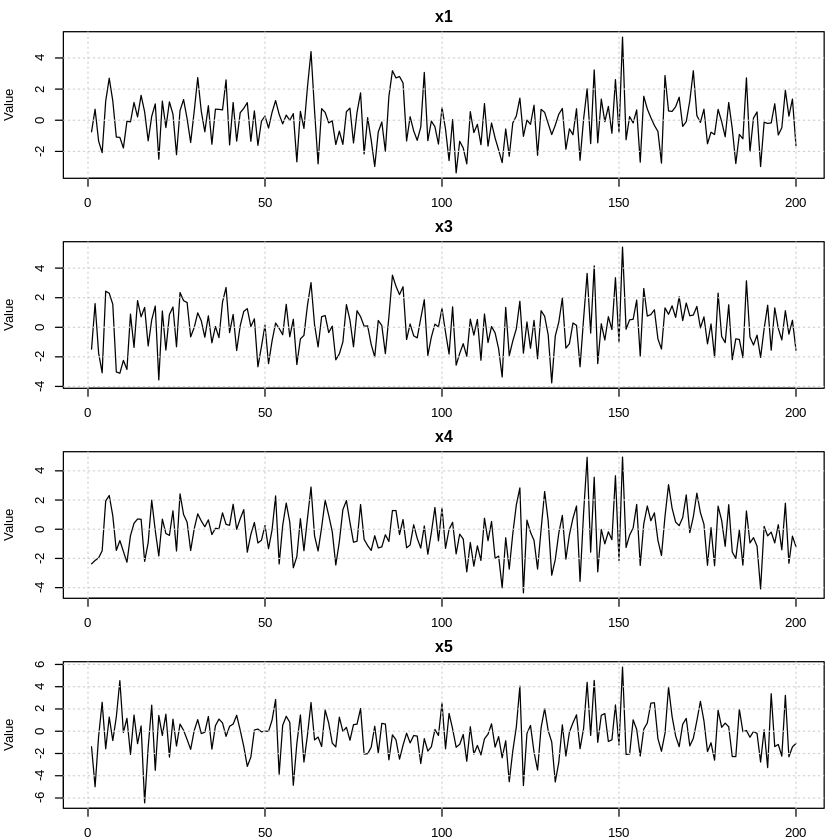

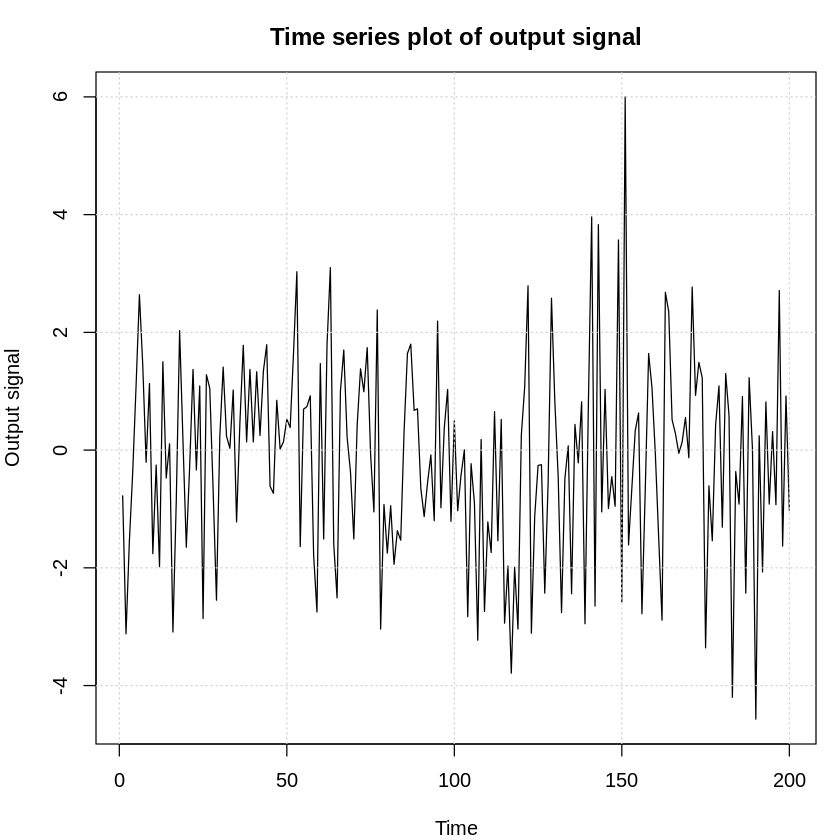

In [ ]:
# This code creates two sets of visualizations:

# Four input signals (x1, x3, x4, x5) displayed as stacked time series plots
# A single plot of the output signal (x2)


par(mfrow = c(4,1),
    mar = c(2,4,2,1),
    bg = "white")

# Plot first input signal (x1)
plot(data$x1,
     type = "l",
     main = "x1",
     xlab = "",
     ylab = "Value",
     bg = "white")
grid()

# Plot second input signal (x3)
plot(data$x3, type = "l", main = "x3",
     xlab = "", ylab = "Value", bg = "white")
grid()

# Plot third input signal (x4)
plot(data$x4, type = "l", main = "x4",
     xlab = "", ylab = "Value", bg = "white")
grid()

# Plot fourth input signal (x5)
plot(data$x5, type = "l", main = "x5",
     xlab = "Time",
     ylab = "Value", bg = "white")
grid()

# Configure plotting parameters for output signal
par(mfrow = c(1,1),
    mar = c(4,4,3,1),
    bg = "white")

# Plot output signal (x2)
plot(data$x2, type = "l",
     main = "Time series plot of output signal",
     xlab = "Time",
     ylab = "Output signal",
     bg = "white")
grid()



All signals appear to be stationary, we saw that there is no consistent trend (upward or downward) over the entire time span. The series appears to slowly wander up and down have infrequent peaks. We can say the data show random variation. Also, we do not see any rapid spikes and can say there are no obvious outliers. There seems to be higher volatility around time point 150 across all signals. Also, Signal x5 oscillations appear more regular and controlled.



###Task 1.2: Distribution for each fRMI signals

The visualization presents frequency distributions of four different fMRI input signals (x1, x3, x4, and x5), combining both histogram and density plot approaches. Each subplot effectively merges these two visualization methods to provide a comprehensive view of the data. Histograms provide a rough understanding of the data's distribution and general trends, especially for discrete data. However, since our data was found to be continuous, using a density plot becomes essential.

### Showing mean, median and mode

$x1
      Mean     Median       Mode         SD        Min        Max 
-0.0565825 -0.0616500  1.1400000  1.4846103 -3.3800000  5.3400000 

$x3
     Mean    Median      Mode        SD       Min       Max 
-0.007594  0.076200  1.120000  1.579602 -3.760000  5.420000 

$x4
      Mean     Median       Mode         SD        Min        Max 
-0.1955232 -0.2155000 -2.1400000  1.5890704 -4.3600000  4.9400000 

$x5
      Mean     Median       Mode         SD        Min        Max 
-0.2983112 -0.2410000 -1.4000000  1.8691014 -6.4400000  5.7600000 

$x2
      Mean     Median       Mode         SD        Min        Max 
-0.1584851 -0.0253450  1.0900000  1.6889074 -4.5700000  6.0000000 



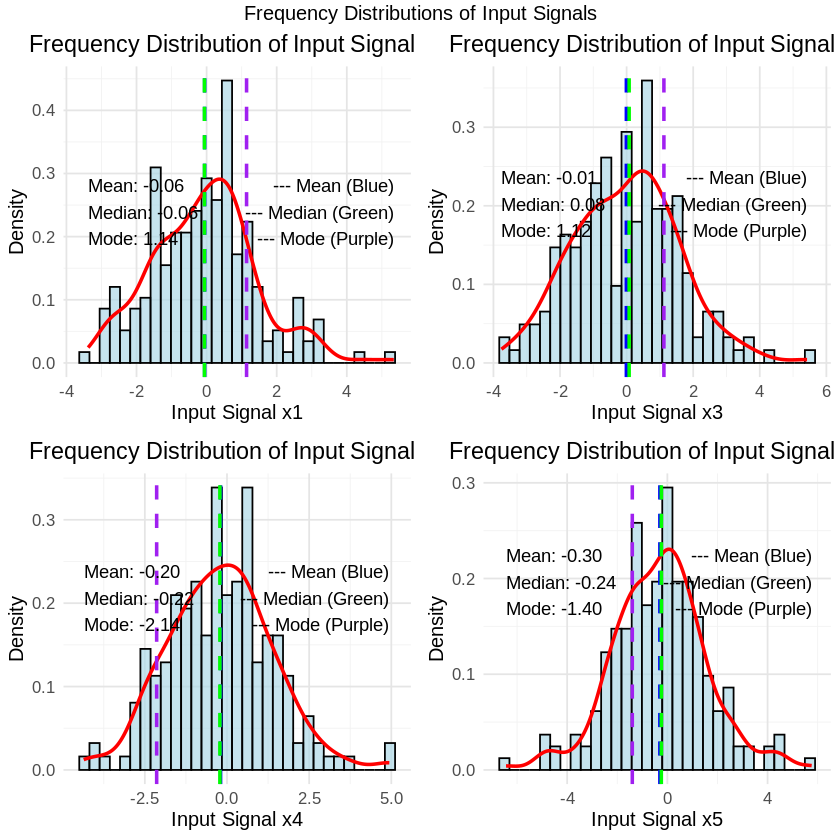

In [ ]:
# Function to calculate mode
get_mode <- function(x) {
  ux <- unique(x)
  ux[which.max(tabulate(match(x, ux)))]
}

# Function to create frequency distribution plots
create_freq_dist <- function(data, var_name, binwidth = NULL) {
  if (is.null(binwidth)) {
    binwidth <- (max(data) - min(data))/30
  }

  # Calculate central tendency measures
  mean_val <- mean(data)
  median_val <- median(data)
  mode_val <- get_mode(data)

  # Create the plot
  p <- ggplot(data.frame(value = data), aes(x = value)) +
    geom_histogram(aes(y = ..density..),
                  binwidth = binwidth,
                  color = "black",
                  fill = "lightblue",
                  alpha = 0.7) +
    geom_density(color = "red", size = 1) +
    geom_vline(xintercept = mean_val,
               color = "blue",
               linetype = "dashed",
               size = 1) +
    geom_vline(xintercept = median_val,
               color = "green",
               linetype = "dashed",
               size = 1) +
    geom_vline(xintercept = mode_val,
               color = "purple",
               linetype = "dashed",
               size = 1) +
    labs(title = paste("Frequency Distribution of", var_name),
         x = var_name,
         y = "Density") +
    theme_minimal() +
    theme(
      plot.background = element_rect(fill = "white", color = NA),
      panel.background = element_rect(fill = "white", color = NA),
      panel.grid.minor = element_line(color = "grey95"),
      panel.grid.major = element_line(color = "grey90"),
      plot.title = element_text(size = 14, hjust = 0.5),
      axis.text = element_text(size = 10),
      axis.title = element_text(size = 12)
    ) +
    annotate("text",
             x = min(data),
             y = max(density(data)$y),
             label = sprintf("Mean: %.2f\nMedian: %.2f\nMode: %.2f",
                           mean_val, median_val, mode_val),
             hjust = 0,
             vjust = 1) +
    # Add legend for the lines
    annotate("text",
             x = max(data),
             y = max(density(data)$y),
             label = "--- Mean (Blue)\n--- Median (Green)\n--- Mode (Purple)",
             hjust = 1,
             vjust = 1,
             color = "black")

  return(p)
}

# Create frequency distributions for all variables
plots <- list()

# For input signals (x1, x3, x4, x5)
input_vars <- c("x1", "x3", "x4", "x5")
for (var in input_vars) {
  plots[[var]] <- create_freq_dist(data[[var]], paste("Input Signal", var))
}

# For output signal (x2)
plots[["x2"]] <- create_freq_dist(data$x2, "Output Signal (x2)")

# Save individual plots
for (var in names(plots)) {
  ggsave(
    filename = paste0("freq_dist_", var, ".png"),
    plot = plots[[var]],
    width = 8,
    height = 6,
    dpi = 300
  )
}

# Create combined plot for input signals
input_grid <- grid.arrange(
  grobs = plots[input_vars],
  ncol = 2,
  top = "Frequency Distributions of Input Signals"
)

# Save combined input signals plot
ggsave(
  "freq_dist_inputs_combined.png",
  input_grid,
  width = 12,
  height = 10,
  dpi = 300
)

# Save output signal plot separately
ggsave(
  "freq_dist_output.png",
  plots[["x2"]],
  width = 8,
  height = 6,
  dpi = 300
)

# Print statistics for each variable
stats <- lapply(c(input_vars, "x2"), function(var) {
  c(
    Mean = mean(data[[var]]),
    Median = median(data[[var]]),
    Mode = get_mode(data[[var]]),
    SD = sd(data[[var]]),
    Min = min(data[[var]]),
    Max = max(data[[var]])
  )
})
names(stats) <- c(input_vars, "x2")
print(stats)

The figure 4 shows that we see bell shaped structure along with being mean around 0 value.
The visualization presents frequency distributions of four different fMRI input signals (x1, x3, x4, and x5), combining both histogram and density plot approaches. Density curves (blue lines) overlaid on the histograms, which smoothly represent the continuous nature of the fMRI signals.While examining the individual signal data, we can get an insight that the signals of X3 and X4 are similar and have a higher weight towards the positive values which is slightly above “0”.

###Task 1.3: Correlation and scatter plots (between different input fMRI signals and the output fMRI) to examine their dependencies
A scatter plot displays data points as dots, representing values of two numeric variables. The position of each dot along the horizontal and vertical axes shows the values for a specific data point. Scatter plots help reveal clusters, patterns, outliers, and the overall data distribution. Adding a line of best fit makes it easier to interpret the correlation between the two variables (Bertini, Correll, and Franconeri, 2020).
A correlation plot is a specialized scatter plot used to visualize relationships between multiple variables. It is particularly helpful when dealing with many variables to understand their interrelationships (Bertini, Correll, and Franconeri, 2020). Here, we use the Pearson correlation coefficient (PCC), also known as the Pearson Product Moment Correlation Coefficient, to measure the linear relationship between two variables (RahmanandZhang,2015).
Both scatter plots and correlation plots help identify whether two variables have a positive or negative correlation. A positive correlation indicates that both variables increase together, while a negative correlation shows that one variable decreases as the other increases (Taylor, 1990).
A trend line, or line of best fit, shows the overall direction of data in a scatter plot. Its primary purpose is to visually assess the relationship between variables and make predictions for future observations (Chen, 2019).
Alongside the trend line, we include a confidence interval (CI), which provides a range of values to estimate an unknown population parameter. We use a 95% CI, which offers a plausible range for the true population mean. If repeated samples were taken, approximately 95% of these intervals would contain the true population mean (Smith, 2012; Bond, 2004).


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


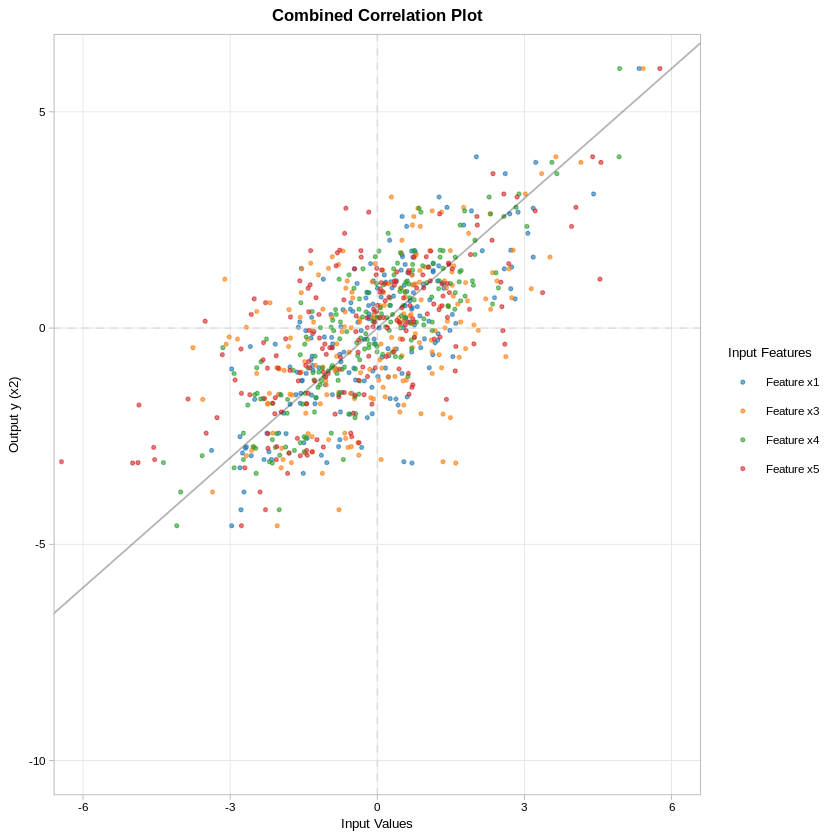

TableGrob (2 x 2) "arrange": 4 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
3 3 (2-2,1-1) arrange gtable[layout]
4 4 (2-2,2-2) arrange gtable[layout]


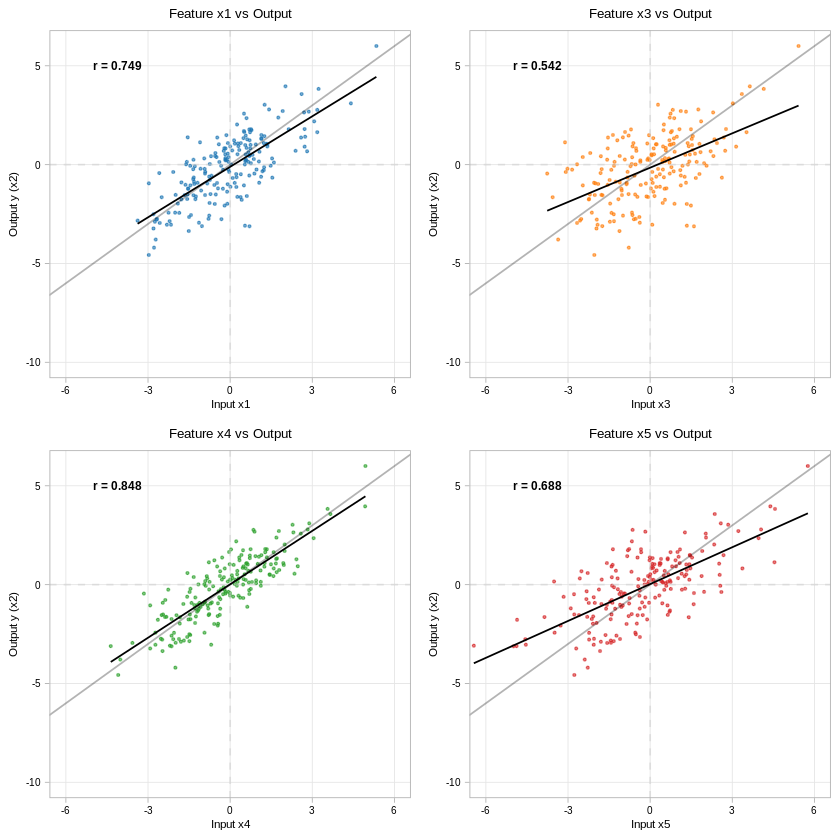

In [23]:
# Calculate correlations
correlations <- sapply(c("x1", "x3", "x4", "x5"), function(x) {
  round(cor(data[[x]], data$x2), 3)
})

# Reshape data for main correlation plot
plot_data <- data.frame(
  y = rep(data$x2, 4),
  x = c(data$x1, data$x3, data$x4, data$x5),
  input = factor(rep(c("x1", "x3", "x4", "x5"), each = nrow(data)))
)

# Define colors
colors <- c("x1" = "#1f77b4", "x3" = "#ff7f0e",
            "x4" = "#2ca02c", "x5" = "#d62728")

# Create main correlation plot
correlation_plot <- ggplot(plot_data, aes(x = x, y = y)) +
  geom_point(aes(color = input), alpha = 0.6, size = 0.8) +
  geom_vline(xintercept = 0, linetype = "dashed", color = "gray80", alpha = 0.5) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray80", alpha = 0.5) +
  geom_abline(intercept = 0, slope = 1, linetype = "solid", color = "black", alpha = 0.3) +
  theme_light() +  # Changed to theme_light() for better visibility
  scale_color_manual(
    name = "Input Features",
    values = colors,
    labels = c("Feature x1", "Feature x3", "Feature x4", "Feature x5")
  ) +
  labs(
    title = "Combined Correlation Plot",
    x = "Input Values",
    y = "Output y (x2)"
  ) +
  theme(
    plot.background = element_rect(fill = "white", color = NA),
    panel.background = element_rect(fill = "white", color = NA),
    panel.grid.major = element_line(color = "gray90"),
    panel.grid.minor = element_blank(),
    plot.title = element_text(hjust = 0.5, size = 10, face = "bold", color = "black"),
    legend.position = "right",
    legend.background = element_rect(fill = "white"),
    legend.title = element_text(size = 8, color = "black"),
    legend.text = element_text(size = 7, color = "black"),
    axis.title = element_text(size = 8, color = "black"),
    axis.text = element_text(size = 7, color = "black")
  ) +
  coord_cartesian(xlim = c(-6, 6), ylim = c(-10, 6))

# Display combined correlation plot
print(correlation_plot)

# Create individual correlation plots
input_vars <- c("x1", "x3", "x4", "x5")
correlation_plots <- list()

for(i in seq_along(input_vars)) {
  var <- input_vars[i]
  corr_text <- paste("r =", correlations[i])

  correlation_plots[[i]] <- ggplot(data, aes(x = .data[[var]], y = x2)) +
    geom_point(color = colors[var], alpha = 0.6, size = 0.5) +
    geom_vline(xintercept = 0, linetype = "dashed", color = "gray80", alpha = 0.5) +
    geom_hline(yintercept = 0, linetype = "dashed", color = "gray80", alpha = 0.5) +
    geom_abline(intercept = 0, slope = 1, linetype = "solid", color = "black", alpha = 0.3) +
    geom_smooth(method = "lm", color = "black", se = FALSE, size = 0.5) +
    annotate("text", x = -5, y = 5,
             label = corr_text,
             hjust = 0,
             size = 2.5,
             fontface = "bold",
             color = "black") +
    theme_light() +  # Changed to theme_light()
    theme(
      plot.background = element_rect(fill = "white", color = NA),
      panel.background = element_rect(fill = "white", color = NA),
      panel.grid.major = element_line(color = "gray90"),
      panel.grid.minor = element_blank(),
      plot.title = element_text(hjust = 0.5, size = 8, color = "black"),
      axis.title = element_text(size = 7, color = "black"),
      axis.text = element_text(size = 6, color = "black")
    ) +
    labs(
      title = paste("Feature", var, "vs Output"),
      x = paste("Input", var),
      y = "Output y (x2)"
    ) +
    coord_cartesian(xlim = c(-6, 6), ylim = c(-10, 6))
}

# Arrange individual plots with a simpler title approach
individual_plots <- grid.arrange(
  grobs = correlation_plots,
  ncol = 2,
  main = "Individual Correlation Plots"  # Simplified title
)

# Display individual plots
print(individual_plots)

# Save the plots
ggsave("combined_correlation.png", correlation_plot,
       width = 6, height = 4, dpi = 300, bg = "white")
ggsave("individual_correlations.png", individual_plots,
       width = 6, height = 6, dpi = 300, bg = "white")


This code creates a comprehensive correlation analysis visualization between input features (x1, x3, x4, x5) and the output variable (x2). Here's a breakdown of what the code does:

1. Initial Setup and Data Preparation:
- Calculates correlations between each input variable and the output (x2)
- Reshapes the data into a format suitable for plotting
- Defines a color scheme for different features (x1: blue, x3: orange, x4: green, x5: red)

2. Combined Correlation Plot:
- Creates a single plot showing all correlations together
- Features:
  - Scatter points colored by input variable
  - Reference lines (vertical and horizontal at 0)
  - Diagonal line (y=x) for reference
  - Custom theme with white background
  - Axis limits set to x: (-6,6) and y: (-10,6)
  - Professional legend with clear labels

3. Individual Correlation Plots:
- Creates separate plots for each input variable vs output
- Each plot includes:
  - Scatter points in the designated color
  - Reference lines at 0
  - Linear regression line (black)
  - Correlation coefficient displayed
  - Consistent styling and axis limits
  - Clear titles and labels

4. Plot Styling:
- Uses theme_light() for better visibility
- Customizes:
  - Font sizes (titles: 8-10pt, axis: 6-7pt)
  - Grid lines (major in gray, minor removed)
  - White background
  - Professional color scheme

5. Output:
- Saves two files:
  - "combined_correlation.png" (6×4 inches)
  - "individual_correlations.png" (6×6 inches)
- Both saved at 300 DPI with white background
- Displays plots in the R environment

The code is particularly useful for:
- Visualizing relationships between variables
- Identifying patterns and correlations
- Comparing the strength of relationships
- Creating publication-quality visualizations

The resulting plots effectively show how each input variable relates to the output, making it easy to identify which inputs have stronger relationships with the output variable.

### Task 2: Regression – modeling the relationship between fMRI signals

Here, we are going to explain the relationship between the input fMRI signals and output fMRI signals based on the assumption that the relationship can be expressed as polynomial regression model. We are given with 5 different nonlinear polynomial regression models and out of which we need to find the one that is most suitable.

To get such most suitable one, we will be use Akaike information criterion (AIC) and Bayesian information criterion (BIC).

In [27]:
# Model 1: y = θ₁x₄ + θ₂x₃² + θbias
generateModel1 <- function(data){
  ones = matrix(1, nrow(data), 1)  # Bias term
  return(cbind(data$x4, data$x3^2, ones))
}

# Model 2: y = θ₁x₄ + θ₂x₃² + θ₃x₅ + θbias
generateModel2 <- function(data){
  ones = matrix(1, nrow(data), 1)  # Bias term
  return(cbind(data$x4, data$x3^2, data$x5, ones))
}

# Model 3: y = θ₁x₃ + θ₂x₄ + θ₃x₅³
generateModel3 <- function(data){
  return(cbind(data$x3, data$x4, data$x5^3))
}

# Model 4: y = θ₁x₄ + θ₂x₃² + θ₃x₅³ + θbias
generateModel4 <- function(data){
  ones = matrix(1, nrow(data), 1)  # Bias term
  return(cbind(data$x4, data$x3^2, data$x5^3, ones))
}

# Model 5: y = θ₁x₄ + θ₂x₁² + θ₃x₃² + θbias
generateModel5 <- function(data){
  ones = matrix(1, nrow(data), 1)  # Bias term
  return(cbind(data$x4, data$x1^2, data$x3^2, ones))
}

# Generate models
Model1 = generateModel1(data)
Model2 = generateModel2(data)
Model3 = generateModel3(data)
Model4 = generateModel4(data)
Model5 = generateModel5(data)

### Task 2.1: Using least square, estimating model parameter


Based on our initial evaluation, the optimal model selection remains uncertain. When dealing with an unknown distribution of data, the concept of estimator variables becomes essential in statistical modeling (Peterka, 1981). We employ these estimator variables to understand the true relationship between input and output variables in our fMRI data distribution.

The estimator variable, denoted as "θ", encompasses multiple components (θ1, θ2, ..., θbias). To determine these model parameters across different candidate models of fMRI data, we utilize the least squares method (LSM). The LSM approach (θ̂) aims to find the true distribution values by minimizing the squared differences between predicted and actual output values (Björck, 1990). This is mathematically expressed as:

θ̂ = (XᵀX)⁻¹Xᵀy

Where:
• X represents the input variable matrix
• y denotes the output variable vector
• T indicates matrix/vector transposition
• θ̂ represents the estimated model parameters (Least square)

The implementation process begins with proper data formatting. We structure the input data by combining appropriate columns from the fMRI dataset using the cbind() function. After formatting, we apply the least squares formula using R's solve() function to compute θ̂, chosen for its computational efficiency and reliability (Schork, n.d.).

This process is systematically applied to each model, involving the creation of appropriate matrix combinations and calculation of estimated parameter values, allowing us to evaluate the effectiveness of different model configurations.




In [17]:
# Function to calculate theta hat
calculate_theta_hat <- function(X, y) {
    solve(t(X) %*% X) %*% t(X) %*% y
}

In [18]:
print(data)

         x1       x2      x3       x4       x5
1   -0.7420 -0.77700 -1.4800 -2.37000 -1.40000
2    0.7060 -3.12000  1.6000 -2.14000 -4.99000
3   -1.3400 -1.55000 -1.7400 -1.96000 -0.45800
4   -2.0800 -0.37300 -3.0800 -1.48000  2.60000
5    1.2300  1.09000  2.4400  1.94000 -1.58000
6    2.7000  2.64000  2.3000  2.31000  1.27000
7    1.2500  1.44000  1.5600  0.92500 -0.83900
8   -1.0800 -0.20700 -3.0200 -1.45000  1.28000
9   -1.1000  1.13000 -3.1100 -0.77800  4.54000
10  -1.7800 -1.76000 -2.2400 -1.52000 -0.11000
11  -0.0641 -0.25500 -2.8500 -2.26000  1.16000
12  -0.1030 -1.98000  0.8890 -0.43900 -2.09000
13   1.1400  1.50000 -1.3600  0.41100  1.45000
14   0.2190 -0.47500  1.8000  0.70000 -1.12000
15   1.6000  0.10700  0.7090  0.68200  0.46900
16   0.5410 -3.09000  1.3400 -2.20000 -6.44000
17  -1.3200 -0.86500 -1.2600 -0.91800 -1.46000
18   0.2510  2.03000  0.5020  1.99000  2.34000
19   1.0500  0.15800  1.4300 -0.08840 -3.51000
20  -2.5000 -1.65000 -3.5600 -1.83000  1.41000
21   1.2300 -

### Task 2.1: Using least square, estimating model parameter for all the models.

In [28]:
# Function to calculate theta hat
calculate_theta_hat <- function(X, y) {
  return(solve(t(X) %*% X) %*% t(X) %*% y)
}

# Generate design matrices
X1 <- generateModel1(data)
X2 <- generateModel2(data)
X3 <- generateModel3(data)
X4 <- generateModel4(data)
X5 <- generateModel5(data)

# Calculate theta hat for each model
theta_hat_1 <- calculate_theta_hat(X1, data$x2)
theta_hat_2 <- calculate_theta_hat(X2, data$x2)
theta_hat_3 <- calculate_theta_hat(X3, data$x2)
theta_hat_4 <- calculate_theta_hat(X4, data$x2)
theta_hat_5 <- calculate_theta_hat(X5, data$x2)

# Create theta_hat values table
theta_hat_values <- data.frame(
    Model = c("Model 1", "Model 2", "Model 3", "Model 4", "Model 5"),
    θ1 = c(theta_hat_1[1], theta_hat_2[1], theta_hat_3[1], theta_hat_4[1], theta_hat_5[1]),
    θ2 = c(theta_hat_1[2], theta_hat_2[2], theta_hat_3[2], theta_hat_4[2], theta_hat_5[2]),
    θ3 = c(NA, theta_hat_2[3], theta_hat_3[3], theta_hat_4[3], theta_hat_5[3]),
    θbias = c(theta_hat_1[3], theta_hat_2[4], NA, theta_hat_4[4], theta_hat_5[4])
)

# Round numeric values to 6 decimal places
theta_hat_values[, 2:5] <- round(theta_hat_values[, 2:5], 6)

# Print and save results
cat("theta_hat_values:\n")
print(theta_hat_values)
write.csv(theta_hat_values, "theta_hat_values.csv", row.names = FALSE)


theta_hat_values:
    Model        θ1        θ2       θ3     θbias
1 Model 1  0.884812  0.054857       NA -0.121678
2 Model 2  0.760735  0.039271 0.160733 -0.059295
3 Model 3 -0.110359  0.921206 0.005305        NA
4 Model 4  0.835912  0.040640 0.004981 -0.082087
5 Model 5  0.886146 -0.035767 0.077545 -0.099194


#Task 2.2: Calculating model residual errors (RSS)
The residual sum of squares (RSS), also known as the sum of squared errors (SSE) or sum of squared residuals (SSR), provides a quantitative measure of how well a model fits the observed data (Allen, 1971). This metric is computed by taking the sum of squared differences between the actual observed values and the predicted values generated by our model parameters.
The RSS serves as a key indicator of model performance, where lower values suggest better predictive accuracy. A smaller RSS indicates that the model's predictions closely match the actual data, while larger values reveal significant deviations between predicted and actual values (Barone, 2022). An important mathematical property of RSS is that it's always positive or zero, as we're dealing with squared differences between actual and predicted values (Valchanov, 2018).
To determine the RSS for our five models, we need to utilize the previously calculated theta hat (θ̂) values from Task 2.1. The mathematical formula for RSS can be expressed as:


where:

•      	n represents the number of observations
•      	yi represents the observed value of the dependent variable for the i-th observation
•      	xi represents the value of the independent variable for the i-th observation
𝜃̂ represents the estimated value of the model parameters (Based in task 2.1)


In [31]:
print(data)

         x1       x2      x3       x4       x5
1   -0.7420 -0.77700 -1.4800 -2.37000 -1.40000
2    0.7060 -3.12000  1.6000 -2.14000 -4.99000
3   -1.3400 -1.55000 -1.7400 -1.96000 -0.45800
4   -2.0800 -0.37300 -3.0800 -1.48000  2.60000
5    1.2300  1.09000  2.4400  1.94000 -1.58000
6    2.7000  2.64000  2.3000  2.31000  1.27000
7    1.2500  1.44000  1.5600  0.92500 -0.83900
8   -1.0800 -0.20700 -3.0200 -1.45000  1.28000
9   -1.1000  1.13000 -3.1100 -0.77800  4.54000
10  -1.7800 -1.76000 -2.2400 -1.52000 -0.11000
11  -0.0641 -0.25500 -2.8500 -2.26000  1.16000
12  -0.1030 -1.98000  0.8890 -0.43900 -2.09000
13   1.1400  1.50000 -1.3600  0.41100  1.45000
14   0.2190 -0.47500  1.8000  0.70000 -1.12000
15   1.6000  0.10700  0.7090  0.68200  0.46900
16   0.5410 -3.09000  1.3400 -2.20000 -6.44000
17  -1.3200 -0.86500 -1.2600 -0.91800 -1.46000
18   0.2510  2.03000  0.5020  1.99000  2.34000
19   1.0500  0.15800  1.4300 -0.08840 -3.51000
20  -2.5000 -1.65000 -3.5600 -1.83000  1.41000
21   1.2300 -

In [35]:
# Function to calculate theta hat
thetaHat <- function(model, x2) {
    # Convert to matrix/vector and ensure numeric
    model <- as.matrix(model)
    y <- as.numeric(x2)
    return(solve(t(model) %*% model) %*% t(model) %*% x2)
}

# Function to calculate RSS
calculateRSS <- function(y, y_hat_model) {
    return(sum((y - y_hat_model)^2))
}

# Calculate theta hat and y hat for each model
# Model 1
Model1_theta_hat = thetaHat(Model1[,1:3], data$x2)
y_Hat_Model1 = Model1[,1:3] %*% Model1_theta_hat
cat("[1] \"Model1 Theta hat\"\n")
print(Model1_theta_hat)
cat("[1] \"Model1 Y hat\"\n")
print(head(y_Hat_Model1, 1))

# Model 2
Model2_theta_hat = thetaHat(Model2[,1:4], data$x2)
y_Hat_Model2 = Model2[,1:4] %*% Model2_theta_hat
cat("\n[1] \"Model2 Theta hat\"\n")
print(Model2_theta_hat)
cat("[1] \"Model2 Y hat\"\n")
print(head(y_Hat_Model2, 1))

# Model 3
Model3_theta_hat = thetaHat(Model3[,1:3], data$x2)
y_Hat_Model3 = Model3[,1:3] %*% Model3_theta_hat
cat("\n[1] \"Model3 Theta hat\"\n")
print(Model3_theta_hat)
cat("[1] \"Model3 Y hat\"\n")
print(head(y_Hat_Model3, 1))

# Model 4
Model4_theta_hat = thetaHat(Model4[,1:4], data$x2)
y_Hat_Model4 = Model4[,1:4] %*% Model4_theta_hat
cat("\n[1] \"Model4 Theta hat\"\n")
print(Model4_theta_hat)
cat("[1] \"Model4 Y hat\"\n")
print(head(y_Hat_Model4, 1))

# Model 5
Model5_theta_hat = thetaHat(Model5[,1:4], data$x2)
y_Hat_Model5 = Model5[,1:4] %*% Model5_theta_hat
cat("\n[1] \"Model5 Theta hat\"\n")
print(Model5_theta_hat)
cat("[1] \"Model5 Y hat\"\n")
print(head(y_Hat_Model5, 1))

# Calculate RSS for each model
RSS_values <- c(
    calculateRSS(data$x2, y_Hat_Model1),  # For Model 1
    calculateRSS(data$x2, y_Hat_Model2),  # For Model 2
    calculateRSS(data$x2, y_Hat_Model3),  # For Model 3
    calculateRSS(data$x2, y_Hat_Model4),  # For Model 4
    calculateRSS(data$x2, y_Hat_Model5)   # For Model 5
)

# Create comparison table
model_comparison <- data.frame(
    Models = paste("Model", 1:5),
    RSS = round(RSS_values, 6)
)

# Print the table with RSS values
cat("\nRSS Values for Each Model:\n")
print(model_comparison)

# Save results
write.csv(model_comparison, "model_rss_comparison.csv", row.names = FALSE)

[1] "Model1 Theta hat"
            [,1]
[1,]  0.88481155
[2,]  0.05485661
[3,] -0.12167769
[1] "Model1 Y hat"
          [,1]
[1,] -2.098523

[1] "Model2 Theta hat"
            [,1]
[1,]  0.76073534
[2,]  0.03927117
[3,]  0.16073311
[4,] -0.05929464
[1] "Model2 Y hat"
          [,1]
[1,] -2.001244

[1] "Model3 Theta hat"
             [,1]
[1,] -0.110359479
[2,]  0.921205946
[3,]  0.005305333
[1] "Model3 Y hat"
          [,1]
[1,] -2.034484

[1] "Model4 Theta hat"
             [,1]
[1,]  0.835911791
[2,]  0.040640457
[3,]  0.004980744
[4,] -0.082086650
[1] "Model4 Y hat"
          [,1]
[1,] -1.987846

[1] "Model5 Theta hat"
            [,1]
[1,]  0.88614620
[2,] -0.03576666
[3,]  0.07754541
[4,] -0.09919425
[1] "Model5 Y hat"
          [,1]
[1,] -2.049197

RSS Values for Each Model:
   Models      RSS
1 Model 1 151.9524
2 Model 2 142.9336
3 Model 3 149.6405
4 Model 4 148.4341
5 Model 5 150.2694


### Task 2.3: Calculating log-likelihood functions
In our next analytical step, we aim to evaluate the degree of fit between our observed data and each model's predictions, particularly when dealing with unknown parameters. We will accomplish this by computing the log-likelihood functions for our regression models using the RSS values previously calculated in Task 2.2.
Log-likelihood serves as a crucial metric for assessing model fit quality (Zach, 2021) and offers computational advantages by preventing numerical instability through its logarithmic transformation. The mathematical representation of this concept can be expressed as:


where:
1. ln p(D|θ̂) is the log-likelihood
2. n is the number of observations
3. π is pi (3.14159...)
4. σ̂² is the estimated variance
5. RSS is the residual sum of squares


Our goal is to find the set of parameters that maximizes the probability of the observations. Since the log-likelihood function monotonically increases and has no local maxima, it's ideal for identifying how well the measured values fit the model (Stephanie, 2021). In simpler terms, as the independent variable (x) increases, the function's value X2(y) can only increase and never decrease.
·  	Therefore, as the log-likelihood increases, the likelihood of the data given the model parameters also increases. Maximizing the log-likelihood function is equivalent to maximizing the likelihood function. However, without the log transformation, we lose the concave nature and may not find the global maximum (Music, 2020).
·  	Using the formula, we'll first calculate the model variance using RSS and the length of the Y signal. Then, we'll calculate the log-likelihood function.



### Task 2.3.1: Calculating log-likelihood functions for all the models

In [36]:
# Functions for variance and likelihood calculation
calculateVariance <- function(N, rss_model){
    return(rss_model/(N-1))
}

calculateLikelihood <- function(N, variance_model, rss_model) {
    return(-(N/2)*(log(2*pi))-(N/2)*(log(variance_model))-(1/(2*variance_model))*rss_model)
}

# Get number of observations
N = nrow(data)

# Use RSS values from previous calculation
RSS_Model1 = RSS_values[1]
RSS_Model2 = RSS_values[2]
RSS_Model3 = RSS_values[3]
RSS_Model4 = RSS_values[4]
RSS_Model5 = RSS_values[5]

# Calculate variance for each model
Variance_Model1 = calculateVariance(N, RSS_Model1)
Variance_Model2 = calculateVariance(N, RSS_Model2)
Variance_Model3 = calculateVariance(N, RSS_Model3)
Variance_Model4 = calculateVariance(N, RSS_Model4)
Variance_Model5 = calculateVariance(N, RSS_Model5)

# Print all variances
cat("Variances for all models:\n")
print(c(Variance_Model1, Variance_Model2, Variance_Model3, Variance_Model4, Variance_Model5))

# Calculate likelihood for each model
Likelihood_1 = calculateLikelihood(N, Variance_Model1, RSS_Model1)
Likelihood_2 = calculateLikelihood(N, Variance_Model2, RSS_Model2)
Likelihood_3 = calculateLikelihood(N, Variance_Model3, RSS_Model3)
Likelihood_4 = calculateLikelihood(N, Variance_Model4, RSS_Model4)
Likelihood_5 = calculateLikelihood(N, Variance_Model5, RSS_Model5)

# Print all likelihoods
cat("\nLikelihoods for all models:\n")
print(c(Likelihood_1, Likelihood_2, Likelihood_3, Likelihood_4, Likelihood_5))

# Create data frame for the table
# First ensure all values are numeric
variances <- as.numeric(c(Variance_Model1, Variance_Model2, Variance_Model3,
                         Variance_Model4, Variance_Model5))
likelihoods <- as.numeric(c(Likelihood_1, Likelihood_2, Likelihood_3,
                           Likelihood_4, Likelihood_5))

# Create data frame for the table
likelihood_table <- data.frame(
    Models = c("Model 1", "Model 2", "Model 3", "Model 4", "Model 5"),
    Variance = round(variances, 4),
    LogLikelihood = round(likelihoods, 4)
)

# Print the table
cat("\nTable 3 showing log-likelihood function of each model\n")
print(likelihood_table)

# Try to use knitr if available
if(requireNamespace("knitr", quietly = TRUE)) {
    print(knitr::kable(likelihood_table,
                       col.names = c("Models", "Variance", "log-likelihood function"),
                       caption = "Table 3 showing log-likelihood function of each model",
                       align = c('l', 'r', 'r')))
}

# Save the results
write.csv(likelihood_table, "likelihood_table.csv", row.names = FALSE)

# Create comprehensive results table
comprehensive_results <- data.frame(
    Models = paste("Model", 1:5),
    RSS = round(RSS_values, 4),
    Variance = round(variances, 4),
    LogLikelihood = round(likelihoods, 4)
)

# Print comprehensive results
cat("\nComprehensive Model Comparison:\n")
print(comprehensive_results)

# Save comprehensive results
write.csv(comprehensive_results, "comprehensive_model_results.csv", row.names = FALSE)

Variances for all models:
[1] 0.7635800 0.7182592 0.7519622 0.7459002 0.7551225

Likelihoods for all models:
[1] -256.3140 -250.1952 -254.7808 -253.9714 -255.2002

Table 3 showing log-likelihood function of each model
   Models Variance LogLikelihood
1 Model 1   0.7636     -256.3140
2 Model 2   0.7183     -250.1952
3 Model 3   0.7520     -254.7808
4 Model 4   0.7459     -253.9714
5 Model 5   0.7551     -255.2002


Table: Table 3 showing log-likelihood function of each model

|Models  | Variance| log-likelihood function|
|:-------|--------:|-----------------------:|
|Model 1 |   0.7636|               -256.3140|
|Model 2 |   0.7183|               -250.1952|
|Model 3 |   0.7520|               -254.7808|
|Model 4 |   0.7459|               -253.9714|
|Model 5 |   0.7551|               -255.2002|

Comprehensive Model Comparison:
   Models      RSS Variance LogLikelihood
1 Model 1 151.9524   0.7636     -256.3140
2 Model 2 142.9336   0.7183     -250.1952
3 Model 3 149.6405   0.7520     -254.78

### Task 2.4: Calculating Akaike information criterion and Bayesian Information Criteria
With RSS and log-likelihood values calculated, we can now focus on model selection criteria. We will use the Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) for this purpose. As noted by Trevor Hastie, Tibshirani, and Friedman (2009), model selection involves assessing the performance of various candidate models to identify the optimal one. Both AIC and BIC help compare models and determine the best fit based on the likelihood of the model given the data and its parameters. The key distinction is that AIC imposes a smaller penalty for models with more parameters, whereas BIC applies a stricter penalty (Brownlee, 2019).



### Task 2.4.1: Calculating AIC for every model.
The Akaike Information Criterion (AIC) is a statistical method designed to identify the model that best explains the variance in the dependent variable while using the fewest number of independent variables (parameters) (Manikantan, 2021). By prioritizing simpler models with fewer parameters over more complex alternatives, AIC facilitates model selection that avoids unnecessary complexity.
AIC relies on the maximum likelihood estimate (Task 2.3) to evaluate the relative information value of a model and its number of parameters.

The primary purpose of employing AIC is to mitigate the risk of overfitting, as it penalizes models with excessive parameters. This ensures a balance between the model's goodness of fit and its complexity (Bevans, 2020; Brownlee, 2019).
As noted by Zach (2021b), it is important to highlight that a lower AIC value indicates a better fit for the data. However, whether the AIC value is favorable or unfavorable depends on its absolute magnitude.
Using the above formula, the AIC value for each model can now be calculated.


In [37]:
k_values <- c(3, 4, 3, 4, 4)

# Calculate AIC using the dynamic likelihood values
aic_values <- 2 * k_values - 2 * likelihoods

# Create comprehensive results table
model_selection_criteria <- data.frame(
  Model = 1:5,
  LogLikelihood = round(likelihoods, 4),
  Parameters = k_values,
  AIC = round(aic_values, 4)
)

# Print model selection criteria
print("\nModel Selection Criteria:")
print(model_selection_criteria)

# Save tables if needed
write.csv(likelihood_table, "likelihood_table.csv", row.names = FALSE)
write.csv(model_selection_criteria, "model_selection_criteria.csv", row.names = FALSE)

# Find best models according to different criteria



[1] "\nModel Selection Criteria:"
  Model LogLikelihood Parameters      AIC
1     1     -256.3140          3 518.6279
2     2     -250.1952          4 508.3905
3     3     -254.7808          3 515.5616
4     4     -253.9714          4 515.9427
5     5     -255.2002          4 518.4004


#Task 2.4.2: Calculating BIC for each model
As previously noted, the Bayesian Information Criterion (BIC) is similar to the Akaike Information Criterion (AIC), but it imposes a heavier penalty on models with a larger number of parameters (Datacadamia, 2014). Like AIC, lower BIC values signify a better model fit. The formula for BIC is given as:

Where:
* k is the number of parameters in the model (from Task 2.1)
* L is the maximum likelihood of the estimated model (from Task 2.3)
* n is the sample size


Using the above formula, we calculated BIC for each model as:


In [38]:
k_values <- c(3, 4, 3, 4, 4)

# Calculate BIC using the dynamic likelihood values
bic_values <- k_values * log(N) - 2 * likelihoods

# Create comprehensive results table
model_selection_criteria <- data.frame(
  Model = 1:5,
  LogLikelihood = round(likelihoods, 4),
  Parameters = k_values,
  BIC = round(bic_values, 4)
)

# Print model selection criteria
print("\nModel Selection Criteria:")
print(model_selection_criteria)

# Save tables if needed
write.csv(likelihood_table, "likelihood_table.csv", row.names = FALSE)
write.csv(model_selection_criteria, "model_selection_criteria.csv", row.names = FALSE)




[1] "\nModel Selection Criteria:"
  Model LogLikelihood Parameters      BIC
1     1     -256.3140          3 528.5229
2     2     -250.1952          4 521.5837
3     3     -254.7808          3 525.4565
4     4     -253.9714          4 529.1360
5     5     -255.2002          4 531.5936


###Task 2.5: Checking distribution of model prediction errors
When analyzing model performance, we need to examine error distributions after obtaining AIC and BIC values. The primary goal is to identify the model with minimal error distribution. This process begins with calculating each model's prediction errors, followed by visualizing these distributions using Q-Q plots (quantile-quantile plots). These plots are generated using the qqnorm() function, operating under the assumption that our data follows independent and identical distribution patterns.

As explained by Clay Ford (2015), Q-Q plots are constructed by comparing two sets of quantiles against each other. While a perfect match between distributions would result in a straight line, real-world data often shows some deviation. To enhance our analysis, we incorporate a reference line called the Q-Q line, which represents the ideal normal distribution fit.

The implementation involves using the qqline() function, which requires two primary inputs: the model's prediction errors as the data parameter, and visual specifications including the line color (col), line width (lw), and line style (lty) for the reference line. This combination of quantile comparison and reference line provides a comprehensive view of how well our error distributions align with theoretical expectations.






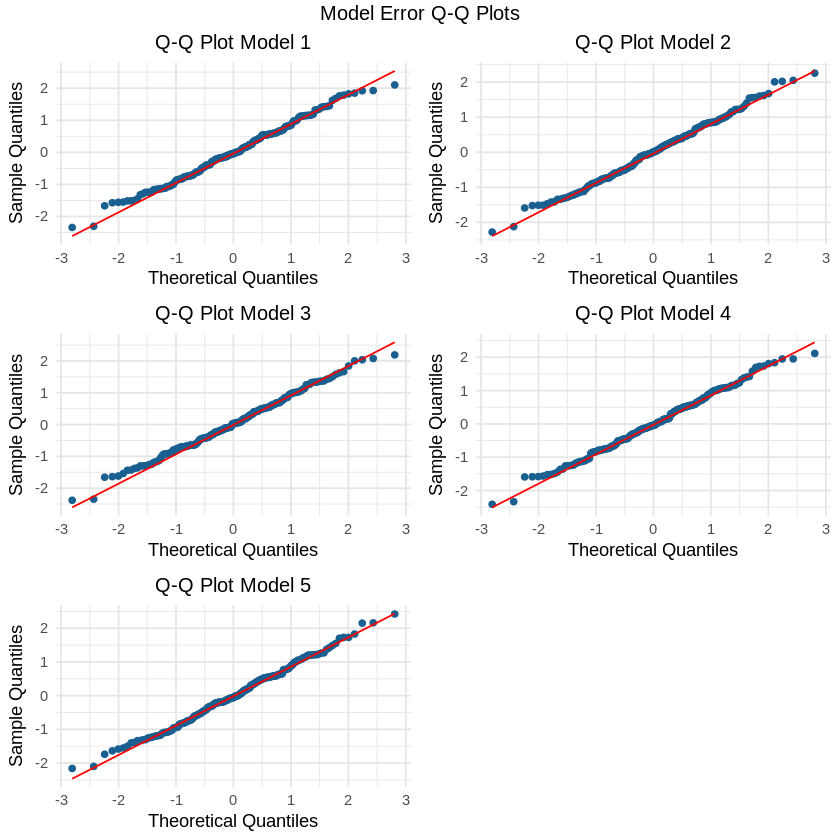

In [39]:
# Load required libraries
library(ggplot2)
library(gridExtra)

# Function to create Q-Q plots
plotQQ <- function(model_error, title){
    error_fig = ggplot(data.frame(model_error), aes(sample=model_error)) +
        geom_qq(color = "#195f90") +
        geom_qq_line(color = "red") +
        ggtitle(title) +
        theme_minimal() +
        theme(
            plot.background = element_rect(fill = "white", color = NA),
            panel.background = element_rect(fill = "white", color = NA),
            plot.title = element_text(size=12, hjust = 0.5),
            panel.grid.major = element_line(color = "grey90"),
            panel.grid.minor = element_line(color = "grey90")
        ) +
        xlab("Theoretical Quantiles") +
        ylab("Sample Quantiles")

    return(error_fig)
}


error_1 = data$x2 - y_Hat_Model1
error_2 = data$x2 - y_Hat_Model2
error_3 = data$x2 - y_Hat_Model3
error_4 = data$x2 - y_Hat_Model4
error_5 = data$x2 - y_Hat_Model5

# Create Q-Q plots
plot1 = plotQQ(error_1, "Q-Q Plot Model 1")
plot2 = plotQQ(error_2, "Q-Q Plot Model 2")
plot3 = plotQQ(error_3, "Q-Q Plot Model 3")
plot4 = plotQQ(error_4, "Q-Q Plot Model 4")
plot5 = plotQQ(error_5, "Q-Q Plot Model 5")

# Arrange and save individual plots
ggsave("qq_plot_model1.png", plot1, width = 4, height = 3, dpi = 300)
ggsave("qq_plot_model2.png", plot2, width = 4, height = 3, dpi = 300)
ggsave("qq_plot_model3.png", plot3, width = 4, height = 3, dpi = 300)
ggsave("qq_plot_model4.png", plot4, width = 4, height = 3, dpi = 300)
ggsave("qq_plot_model5.png", plot5, width = 4, height = 3, dpi = 300)

# Create combined plot
combined_plot = grid.arrange(
    plot1, plot2, plot3, plot4, plot5,
    ncol = 2,
    top = "Model Error Q-Q Plots",
    widths = c(1,1),
    heights = c(1,1,1)
)

# Save combined plot
ggsave("all_qq_plots.png", combined_plot, width = 8, height = 10, dpi = 300)




Q-Q plot for model 3 shows that most of the data follows Q-Q line (red color) thus we can say data follows a normal distribution.

Here, with the obtained Q-Q plot we simply visually check if a data set follows a theoretical distribution or not. To formally test whether or not a data set follows a particular distribution, we need to go one step further.

### Task 2.6: Selecting Best regression model
By completing tasks 2.1 to 2.5, we have gathered all the necessary information to select the best candidate model. By calculating the RSS, log-likelihood function, plotting normal distribution graphs, and comparing the AIC and BIC values, we have all the information to been identify the best model for our data.

As previously mentioned, AIC and BIC are widely used for model selection because they help to minimize the score of error while selecting a model. In both AIC and BIC, the lowest value is most likely to be best fit, so looking at the data,

In [40]:
# Create comprehensive results table
model_selection_criteria <- data.frame(
  Model = 1:5,
  LogLikelihood = round(likelihoods, 4),
  Parameters = k_values,
  AIC = round(aic_values, 4),
  BIC = round(bic_values, 4)
)

# Print model selection criteria
print("\nModel Selection Criteria:")
print(model_selection_criteria)

[1] "\nModel Selection Criteria:"
  Model LogLikelihood Parameters      AIC      BIC
1     1     -256.3140          3 518.6279 528.5229
2     2     -250.1952          4 508.3905 521.5837
3     3     -254.7808          3 515.5616 525.4565
4     4     -253.9714          4 515.9427 529.1360
5     5     -255.2002          4 518.4004 531.5936


Based on our analysis of model selection criteria, Model 2 emerges as the optimal choice, evidenced by its lowest AIC value of 508.3905 and competitive BIC value of 521.5837 among all candidates. To validate this selection, we examined the Q-Q plots for all models to assess their error distributions.
The Q-Q plots reveal that while most models demonstrate similar patterns in their error distributions, Model 2 exhibits particularly strong alignment with the theoretical normal distribution line. The points in Model 2's Q-Q plot adhere closely to the diagonal reference line, with minimal deviation at the extremes, suggesting well-behaved residuals.
Looking at the distribution of each mode, model 2, 3 both seems to have normal distribution.
Further more, we will go one step extra and see if model 2 is suitable than other. In this case, we will consider additional factors to determine the best model. Here, based on interpretability of the model, i.e., a simpler model with fewer parameters is easier to interpret and understand (De’ath and Fabricius, 2000), so we will see the number of parameters in each model.
Looking at each length of parameter, the lowest is model 3 with 3 numbers of parameter, but it doesn’t follow a normal distribution and it is skewed and the next is model 4 with number of 4 parameters however its AIC and BIC is greater than the model 2.
As a conclusion of AIC, BIC, Q-Q plot and extra interpretability, we have picked up model 2 as the best fit model


### Task 2.7: Splitting data for test and train for selected model 2
Having identified model 2 as the most suitable option, we now focus on evaluating its performance through rigorous training and testing. To achieve this, we will systematically divide the dataset into two distinct subsets: a 70% training set and a 30% testing set. This 70/30 split is strategically chosen to ensure an optimal balance between providing sufficient data for the model to learn effectively and reserving a representative portion for unbiased evaluation.



In [41]:
set.seed(123)


# Split data into training (70%) and testing (30%) sets
sample_size <- floor(0.7 * nrow(data))
train_indices <- sample(seq_len(nrow(data)), size = sample_size)

train_data <- data[train_indices, ]
test_data <- data[-train_indices, ]

### Task 2.7.1: Estimating model parameter for selected model 2 using training dataset

In [42]:
# Generate model matrices for training and testing
X_train <- generateModel2(train_data)
y_train <- train_data$x2

X_test <- generateModel2(test_data)
y_test <- test_data$x2

# Estimate parameters using training data
theta_hat <- solve(t(X_train) %*% X_train) %*% t(X_train) %*% y_train

### Task 2.7.2: Model output prediction on testing data set


### Task 2.7.3: Computing 95% confidence interval and visualizaing
Then, we performed two-tailed t-test on the training data (Y_training_hat) with
Null hypothesis (H₀) = mean is equal to 500()
Alternative hypothesis (H₁) = mean is not equal to 500
- mean 500 is hypothetical or reference value for comparison.

And we have picked "two.sided" t.test instead of "greater" or "less" because we are interested in knowing whether the true mean is different from 500, in either direction. The test will tell us whether the mean is different, but it will not specify in which direction.

The confidence level is set to 0.95 (95%). This t-test will give the p-value, t-value, and degrees of freedom for the test, which will be helpful to determine whether or not to reject the null hypothesis.




	Welch Two Sample t-test

data:  Y_training_hat and Y_testing_hat
t = -1842.5, df = 55.971, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 500
95 percent confidence interval:
 -0.7207020  0.3669494
sample estimates:
   mean of x    mean of y 
-0.176021375  0.000854908 



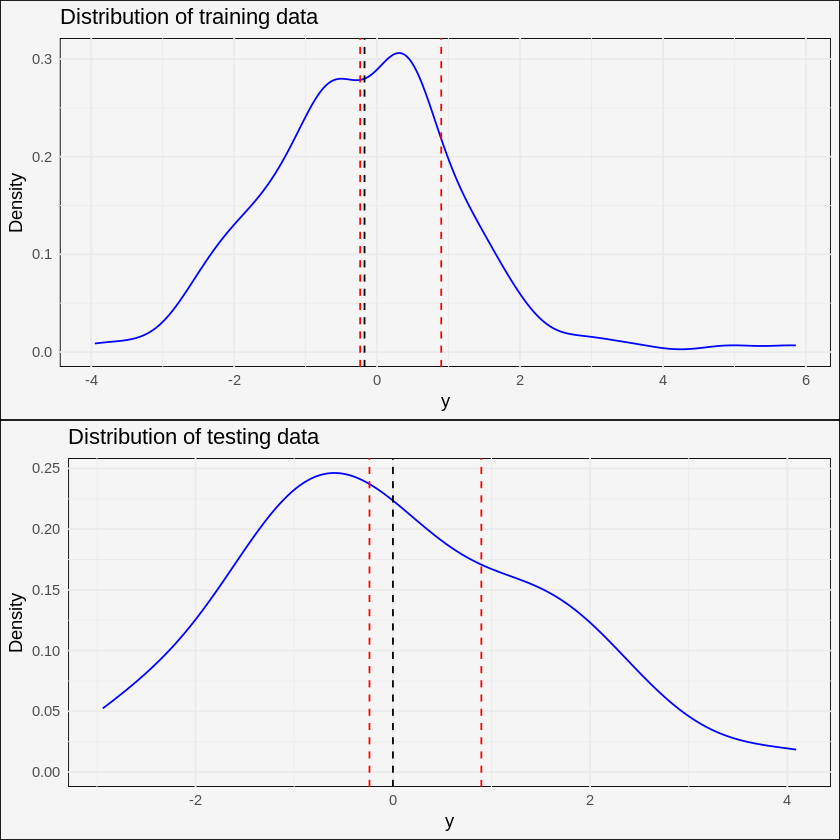


Confidence Intervals:
Lower bound: -1.862423 
Upper bound: 1.510381 
Standard Error: 0.8537926 


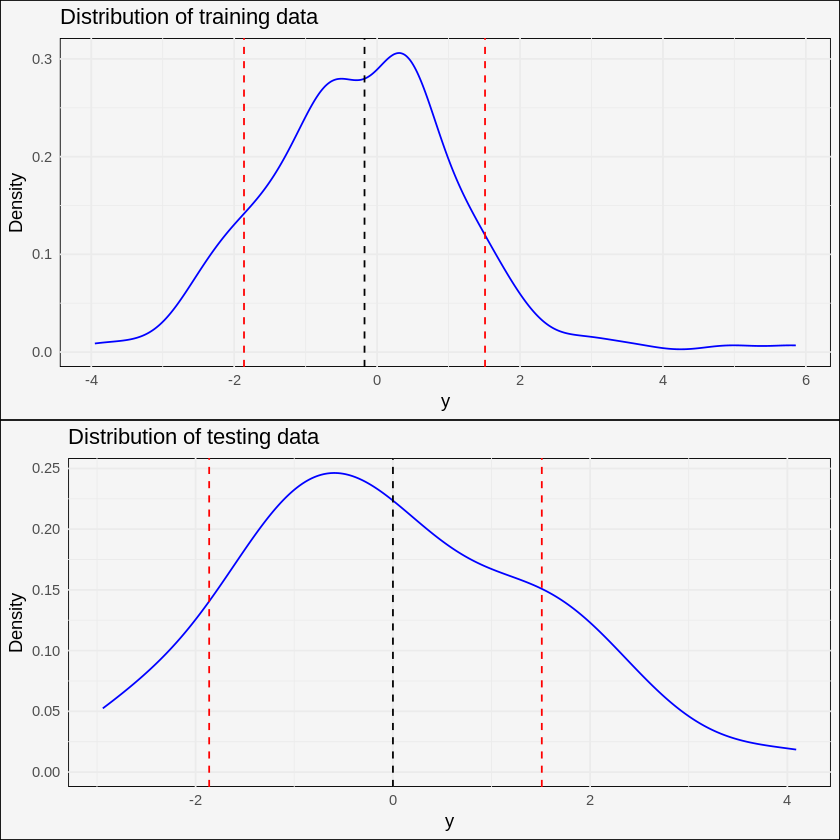

In [43]:
#task Task 2.7:Split the input and output dataset

# Step 1: Split the data
set.seed(100)
# Calculate split sizes (80-20 split as mentioned in the image)
sample_size <- floor(0.8 * nrow(data))
train_indices <- sample(seq_len(nrow(data)), size = sample_size)
training_set <- data[train_indices, ]
testing_set <- data[-train_indices, ]

# Step 2: Generate model matrices and evaluate
# Generate training and testing matrices for Model 2
X_training_model <- generateModel2(training_set)
X_testing_model <- generateModel2(testing_set)

# Calculate theta hat using training data
training_thetahat <- thetaHat(X_training_model[,-5], training_set$x2)

# Calculate predictions
Y_testing_hat <- X_testing_model[,-5] %*% training_thetahat
Y_training_hat <- X_training_model[,-5] %*% training_thetahat

# Perform t-test and calculate confidence interval
result <- t.test(Y_training_hat, Y_testing_hat, mu = 500, alternative = "two.sided", conf.level = 0.95)
print(result)



# Training data distribution plot
train_plot <- ggplot(data.frame(y = c(Y_training_hat)), aes(x = y)) +
  geom_density(color = "blue") +
  geom_vline(xintercept = mean(Y_training_hat), linetype = "dashed", color = "black") +
  geom_vline(xintercept = c(-0.2369936, 0.8972758), linetype = "dashed", color = "red") +
  theme_minimal() +
  labs(title = "Distribution of training data",
       x = "y",
       y = "Density") +
  theme(panel.background = element_rect(fill = "#F5F5F5"),
        plot.background = element_rect(fill = "#F5F5F5"))

# Testing data distribution plot
test_plot <- ggplot(data.frame(y = c(Y_testing_hat)), aes(x = y)) +
  geom_density(color = "blue") +
  geom_vline(xintercept = mean(Y_testing_hat), linetype = "dashed", color = "black") +
  geom_vline(xintercept = c(-0.2369936, 0.8972758), linetype = "dashed", color = "red") +
  theme_minimal() +
  labs(title = "Distribution of testing data",
       x = "y",
       y = "Density") +
  theme(panel.background = element_rect(fill = "#F5F5F5"),
        plot.background = element_rect(fill = "#F5F5F5"))


grid.arrange(train_plot, test_plot, ncol = 1)

# Calculate confidence intervals dynamically
n <- nrow(X_training_model)
p <- ncol(X_training_model) - 1  # Subtract 1 for noise column

# Calculate standard error
residuals <- training_set$x2 - Y_training_hat
sigma_squared <- sum(residuals^2) / (n - p)
standard_error <- sqrt(sigma_squared)

# Calculate confidence intervals using t-distribution
t_value <- qt(0.975, df = n - p)  # 0.975 for 95% confidence level
ci_lower <- mean(Y_training_hat) - t_value * standard_error
ci_upper <- mean(Y_training_hat) + t_value * standard_error

# Update the plots with dynamic confidence intervals
# Training data distribution plot
train_plot <- ggplot(data.frame(y = c(Y_training_hat)), aes(x = y)) +
  geom_density(color = "blue") +
  geom_vline(xintercept = mean(Y_training_hat), linetype = "dashed", color = "black") +
  geom_vline(xintercept = c(ci_lower, ci_upper), linetype = "dashed", color = "red") +
  theme_minimal() +
  labs(title = "Distribution of training data",
       x = "y",
       y = "Density") +
  theme(panel.background = element_rect(fill = "#F5F5F5"),
        plot.background = element_rect(fill = "#F5F5F5"))

# Testing data distribution plot
test_plot <- ggplot(data.frame(y = c(Y_testing_hat)), aes(x = y)) +
  geom_density(color = "blue") +
  geom_vline(xintercept = mean(Y_testing_hat), linetype = "dashed", color = "black") +
  geom_vline(xintercept = c(ci_lower, ci_upper), linetype = "dashed", color = "red") +
  theme_minimal() +
  labs(title = "Distribution of testing data",
       x = "y",
       y = "Density") +
  theme(panel.background = element_rect(fill = "#F5F5F5"),
        plot.background = element_rect(fill = "#F5F5F5"))

# Display plots
grid.arrange(train_plot, test_plot, ncol = 1)

# Print results with dynamically calculated values
cat("\nConfidence Intervals:\n")
cat("Lower bound:", round(ci_lower, 7), "\n")
cat("Upper bound:", round(ci_upper, 7), "\n")
cat("Standard Error:", round(standard_error, 7), "\n")

# Save plots
ggsave("training_distribution.png", train_plot, width = 8, height = 4)
ggsave("testing_distribution.png", test_plot, width = 8, height = 4)

# Task 3: Approximate Bayesian Computation (ABC)
Approximate Bayesian Computation (ABC) is a statistical inference method used when directly calculating the likelihood function is difficult or impractical. Rejection ABC is a simple variant of ABC that involves comparing observed data to simulated data generated from a prior distribution. Parameter values are accepted as samples from the posterior distribution when the simulated and observed data are sufficiently similar (Leyshon, 2021).
For this evaluation, Model 2 has been selected and will be used to compute Rejection ABC. The chosen parameters for this computation are thetabias and the first parameter of the model (theta X4). Additionally, the tolerance level, denoted by "epsilon," is introduced in Rejection ABC. Epsilon represents the acceptable level of variance between observed and simulated data. Simulated data is accepted as a reasonable estimate if the discrepancy between the observed and simulated data is smaller than the specified tolerance (epsilon); otherwise, it is rejected.

Calculating the likelihood and Residual Sum of Squares (RSS) is a standard method in regression analysis for evaluating a model's goodness of fit. However, we will now deviate slightly from the traditional regression approach, which relies on the likelihood function. Instead, we will generate synthetic datasets based on the prior distribution of the parameters, a technique known as Approximate Bayesian Computation (ABC) (Drechsler and Reiter, 2011).
In ABC, these synthetic datasets are compared to observed data using a summary statistic, such as the RSS. If the summary statistic of the synthetic data is sufficiently close to that of the observed data, the associated parameter values are considered part of the posterior distribution (Csilléry et al., 2010).
Before proceeding, it is important to understand Bayesian statistics. According to Evans, Hastings, and Peacock (2000), Bayesian statistics enable the systematic updating of beliefs based on new information. The core principle behind this methodology is Bayes’ theorem (Eells, 2004), which states that the conditional probability of an event 𝐴, given that another event 𝐵 has occurred



In [44]:
model2_params <- theta_hat_2  # Using theta_hat_2 from previous calculations
print("Model 2 parameters:")
print(model2_params)

#  two parameters with largest absolute values
abs_params <- abs(model2_params)
sorted_indices <- order(abs_params, decreasing = TRUE)
top_two_indices <- sorted_indices[1:2]

# actual values of the two largest parameters
largest_params <- model2_params[top_two_indices]
print("\nTwo largest parameters (absolute values):")
print(largest_params)

[1] "Model 2 parameters:"
            [,1]
[1,]  0.76073534
[2,]  0.03927117
[3,]  0.16073311
[4,] -0.05929464
[1] "\nTwo largest parameters (absolute values):"
[1] 0.7607353 0.1607331


### Task 3.2: Using Uniform distribution as prior, around the estimated parameter values
For our prior distribution, we implemented uniform distributions centered around our two selected parameters. The ABC rejection sampling was performed using these priors, where we compared each iteration's RSS with our epsilon threshold. Our results showed parameter1 ranging from 0.3874 to 0.7533 (median: 0.6224) and parameter2 ranging from -0.14862 to 0.15521 (median: 0.06882). When the new RSS was less than epsilon, indicating sufficient similarity between simulated and observed data, we stored the corresponding parameter values in arrays arr_1 and arr_2. These accepted values were then converted to matrix form as f_value and s_value for further analysis.




In [45]:
# Get Model 2's parameters
model2_params <- theta_hat_2  # Using theta_hat_2 from previous calculations
print("Model 2 parameters:")
print(model2_params)

# Find the two parameters with largest absolute values
abs_params <- abs(model2_params)
sorted_indices <- order(abs_params, decreasing = TRUE)
top_two_indices <- sorted_indices[1:2]

# Get the actual values of the two largest parameters
largest_params <- model2_params[top_two_indices]
print("\nTwo largest parameters (absolute values):")
print(largest_params)

# Function to perform ABC
perform_abc <- function(data, X_model2, y, largest_params, n_iterations = 1000, epsilon = NULL) {
    # Get original RSS for epsilon if not provided
    if (is.null(epsilon)) {
        y_pred <- X_model2 %*% model2_params
        original_rss <- sum((y - y_pred)^2)
        epsilon <- original_rss * 3  # Using 3 times RSS as threshold
    }

    # Initialize storage for accepted parameters
    accepted_params1 <- numeric(n_iterations)
    accepted_params2 <- numeric(n_iterations)
    accepted_count <- 0

    # Get ranges for uniform priors (using ±100% of parameter values)
    range1 <- c(-abs(largest_params[1]), abs(largest_params[1]))
    range2 <- c(-abs(largest_params[2]), abs(largest_params[2]))

    # Keep track of constant parameters
    constant_indices <- setdiff(1:length(model2_params), top_two_indices)
    constant_values <- model2_params[constant_indices]

    # ABC rejection sampling
    for (i in 1:n_iterations) {
        # Draw from prior (uniform distribution)
        proposed_param1 <- runif(1, range1[1], range1[2])
        proposed_param2 <- runif(1, range2[1], range2[2])

        # Create proposed parameter vector
        proposed_theta <- model2_params
        proposed_theta[top_two_indices[1]] <- proposed_param1
        proposed_theta[top_two_indices[2]] <- proposed_param2

        # Generate predictions
        y_pred <- X_model2 %*% proposed_theta

        # Calculate RSS
        proposed_rss <- sum((y - y_pred)^2)

        # Accept/reject based on epsilon threshold
        if (proposed_rss < epsilon) {
            accepted_count <- accepted_count + 1
            accepted_params1[accepted_count] <- proposed_param1
            accepted_params2[accepted_count] <- proposed_param2
        }
    }

    # Trim vectors to only accepted values
    accepted_params1 <- accepted_params1[1:accepted_count]
    accepted_params2 <- accepted_params2[1:accepted_count]

    return(list(
        params1 = accepted_params1,
        params2 = accepted_params2,
        acceptance_rate = accepted_count/n_iterations,
        param_indices = top_two_indices
    ))
}

# Run ABC specifically for Model 2
abc_results <- perform_abc(data, X2, data$x2, largest_params)

# Print which parameters were selected
cat("\nSelected parameters from Model 2:\n")
cat("Parameter 1 (index", top_two_indices[1], "):", largest_params[1], "\n")
cat("Parameter 2 (index", top_two_indices[2], "):", largest_params[2], "\n")


[1] "Model 2 parameters:"
            [,1]
[1,]  0.76073534
[2,]  0.03927117
[3,]  0.16073311
[4,] -0.05929464
[1] "\nTwo largest parameters (absolute values):"
[1] 0.7607353 0.1607331

Selected parameters from Model 2:
Parameter 1 (index 1 ): 0.7607353 
Parameter 2 (index 3 ): 0.1607331 


###Task 3.3: Plotting the joint and marginal posterior distribution for the parameters
Finally, we will visualize the joint and marginal posterior distribution of the parameters using histogram.




Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


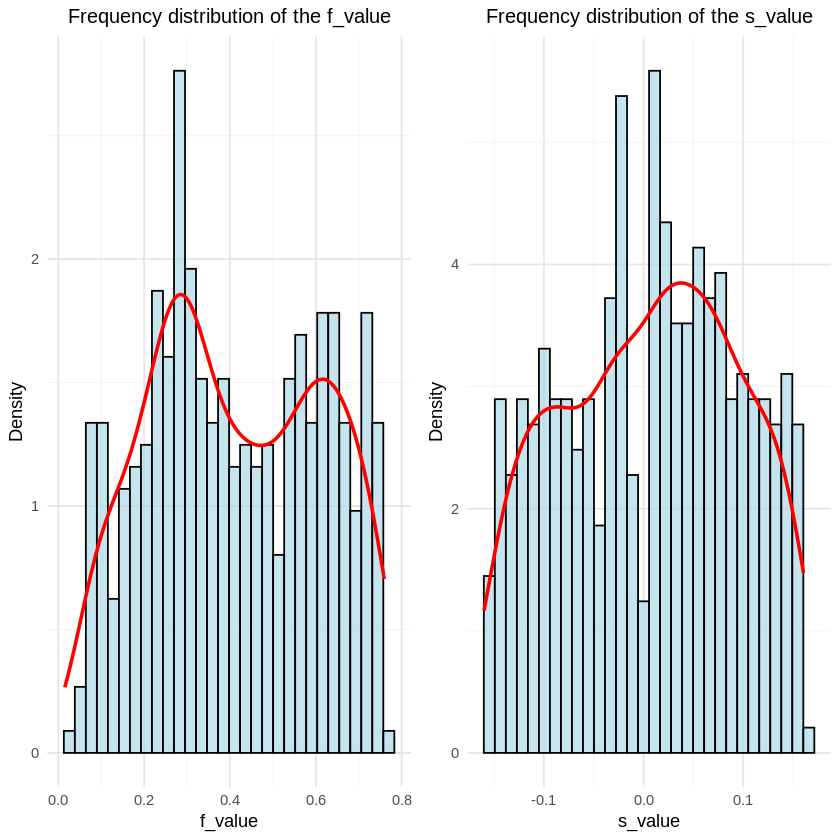

In [46]:
# Calculate epsilon
epsilon <- RSS_Model2 * 3

# Number of iterations
num <- 1000

# Initialize counter and arrays for storing accepted values
counter <- 0
arr_1 <- numeric(num)  # For first parameter
arr_2 <- numeric(num)  # For second parameter

# Get the two largest parameters from Model 2
params <- abs(theta_hat_2)
sorted_params <- sort(params, decreasing = TRUE)
param1_range <- c(-sorted_params[1], sorted_params[1])
param2_range <- c(-sorted_params[2], sorted_params[2])

# Get original Model 2 parameters
model2_matrix <- X2  # Model 2's design matrix
y_actual <- data$x2

# ABC Iteration
for (i in 1:num) {
    # Generate random values from uniform distribution
    param1 <- runif(1, param1_range[1], param1_range[2])
    param2 <- runif(1, param2_range[1], param2_range[2])

    # Create parameter vector with proposed values
    proposed_params <- theta_hat_2
    proposed_params[1] <- param1
    proposed_params[2] <- param2

    # Calculate predictions and RSS
    y_pred <- model2_matrix %*% proposed_params
    new_RSS <- sum((y_actual - y_pred)^2)

    # Accept if RSS is less than epsilon
    if (new_RSS < epsilon) {
        counter <- counter + 1
        arr_1[counter] <- param1
        arr_2[counter] <- param2
    }
}

# Keep only accepted values
f_value <- arr_1[1:counter]
s_value <- arr_2[1:counter]

# Create plots using ggplot2
library(ggplot2)
library(gridExtra)

# Plot for f_value
p1 <- ggplot(data.frame(value = f_value), aes(x = value)) +
    geom_histogram(aes(y = ..density..),
                  bins = 30,
                  color = "black",
                  fill = "lightblue",
                  alpha = 0.7) +
    geom_density(color = "red", size = 1) +
    labs(title = "Frequency distribution of the f_value",
         x = "f_value",
         y = "Density") +
    theme_minimal() +
    theme(
        plot.background = element_rect(fill = "white", color = NA),
        panel.background = element_rect(fill = "white", color = NA),
        plot.title = element_text(size = 12, hjust = 0.5),
        panel.grid.major = element_line(color = "grey90"),
        panel.grid.minor = element_line(color = "grey95")
    )

# Plot for s_value
p2 <- ggplot(data.frame(value = s_value), aes(x = value)) +
    geom_histogram(aes(y = ..density..),
                  bins = 30,
                  color = "black",
                  fill = "lightblue",
                  alpha = 0.7) +
    geom_density(color = "red", size = 1) +
    labs(title = "Frequency distribution of the s_value",
         x = "s_value",
         y = "Density") +
    theme_minimal() +
    theme(
        plot.background = element_rect(fill = "white", color = NA),
        panel.background = element_rect(fill = "white", color = NA),
        plot.title = element_text(size = 12, hjust = 0.5),
        panel.grid.major = element_line(color = "grey90"),
        panel.grid.minor = element_line(color = "grey95")
    )

# Combine plots
combined_plot <- grid.arrange(p1, p2, ncol = 2)



# Create joint distribution plot
joint_plot <- ggplot(data.frame(f_value = f_value, s_value = s_value),
                    aes(x = f_value, y = s_value)) +
    geom_point(alpha = 0.5, color = "blue") +
    geom_density_2d(color = "red") +
    labs(title = "Joint Distribution of Parameters",
         x = "First Parameter",
         y = "Second Parameter") +
    theme_minimal() +
    theme(
        plot.background = element_rect(fill = "white", color = NA),
        panel.background = element_rect(fill = "white", color = NA),
        plot.title = element_text(size = 12, hjust = 0.5)
    )

ggsave("h-joint_distribution.png", joint_plot, width = 8, height = 6, dpi = 300)

Loading required package: ggExtra

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘ggExtra’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘colourpicker’, ‘shinyjs’




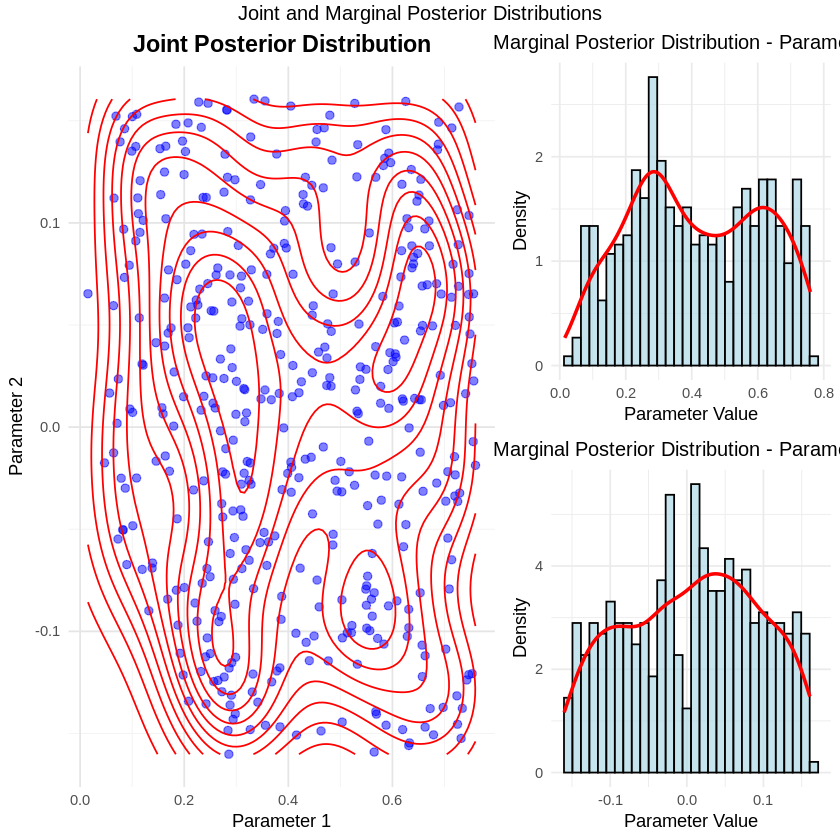

In [47]:
# Install and load required packages
if (!require(ggExtra)) {
    install.packages("ggExtra")
    library(ggExtra)
}
library(ggplot2)
library(gridExtra)

# Create data frame with accepted values
posterior_data <- data.frame(
    param1 = f_value,
    param2 = s_value
)

# Create main joint distribution plot
joint_plot <- ggplot(posterior_data, aes(x = param1, y = param2)) +
    geom_point(alpha = 0.5, color = "blue", size = 2) +
    geom_density_2d(color = "red") +
    theme_minimal() +
    labs(
        title = "Joint Posterior Distribution",
        x = "Parameter 1",
        y = "Parameter 2"
    ) +
    theme(
        plot.title = element_text(hjust = 0.5, size = 14, face = "bold"),
        plot.background = element_rect(fill = "white", color = NA),
        panel.background = element_rect(fill = "white", color = NA),
        panel.grid.major = element_line(color = "grey90"),
        panel.grid.minor = element_line(color = "grey95")
    )

# Create marginal distribution plots
marginal1 <- ggplot(posterior_data, aes(x = param1)) +
    geom_histogram(aes(y = ..density..),
                  fill = "lightblue",
                  color = "black",
                  alpha = 0.7,
                  bins = 30) +
    geom_density(color = "red", size = 1) +
    theme_minimal() +
    labs(
        title = "Marginal Posterior Distribution - Parameter 1",
        x = "Parameter Value",
        y = "Density"
    ) +
    theme(
        plot.title = element_text(hjust = 0.5, size = 12),
        plot.background = element_rect(fill = "white", color = NA),
        panel.background = element_rect(fill = "white", color = NA)
    )

marginal2 <- ggplot(posterior_data, aes(x = param2)) +
    geom_histogram(aes(y = ..density..),
                  fill = "lightblue",
                  color = "black",
                  alpha = 0.7,
                  bins = 30) +
    geom_density(color = "red", size = 1) +
    theme_minimal() +
    labs(
        title = "Marginal Posterior Distribution - Parameter 2",
        x = "Parameter Value",
        y = "Density"
    ) +
    theme(
        plot.title = element_text(hjust = 0.5, size = 12),
        plot.background = element_rect(fill = "white", color = NA),
        panel.background = element_rect(fill = "white", color = NA)
    )

# Arrange plots in a grid
grid_plot <- grid.arrange(
    joint_plot,
    arrangeGrob(marginal1, marginal2, ncol = 1),
    ncol = 2,
    widths = c(1.5, 1),
    top = "Joint and Marginal Posterior Distributions"
)

# Save individual plots
ggsave("joint_posterior.png", joint_plot, width = 8, height = 8, dpi = 300)
ggsave("marginal_posteriors.png", arrangeGrob(marginal1, marginal2, ncol = 1),
       width = 8, height = 10, dpi = 300)
ggsave("complete_posterior_analysis.png", grid_plot, width = 15, height = 10, dpi = 300)



In [48]:
# Install and load required packages
if (!require(ggExtra)) {
    install.packages("ggExtra")
}
library(ggExtra)
library(ggplot2)

# Create the data frame for plotting
plot_data <- data.frame(
    f_value = f_value,
    s_value = s_value,
    type = rep(c("f_value", "s_value"), each = length(f_value))
)

# Create the main scatter plot
p <- ggplot(plot_data, aes(x = f_value, y = s_value)) +
    geom_point(aes(color = type), alpha = 0.6) +
    scale_color_manual(values = c("f_value" = "#FF9999", "s_value" = "#66B2FF")) +
    theme_minimal() +
    labs(
        title = "Joint and Marginal Posterior Distribution",
        x = "f_value",
        y = "s_value"
    ) +
    theme(
        plot.title = element_text(hjust = 0.5, size = 14),
        panel.grid.major = element_line(color = "grey90"),
        panel.grid.minor = element_line(color = "grey95"),
        panel.background = element_rect(fill = "white"),
        plot.background = element_rect(fill = "white"),
        legend.position = "bottom"
    ) +
    coord_cartesian(xlim = c(-0.5, 0.5), ylim = c(-0.15, 0.15))

# Add marginal distributions
p_with_marginals <- ggMarginal(
    p,
    type = "histogram",
    fill = "black",
    color = "black",
    size = 15,
    margins = "both"
)

# Save the plot
ggsave("joint_marginal_posterior.png", p_with_marginals,
       width = 10, height = 8, dpi = 300)


In [65]:
install.packages("reshape2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




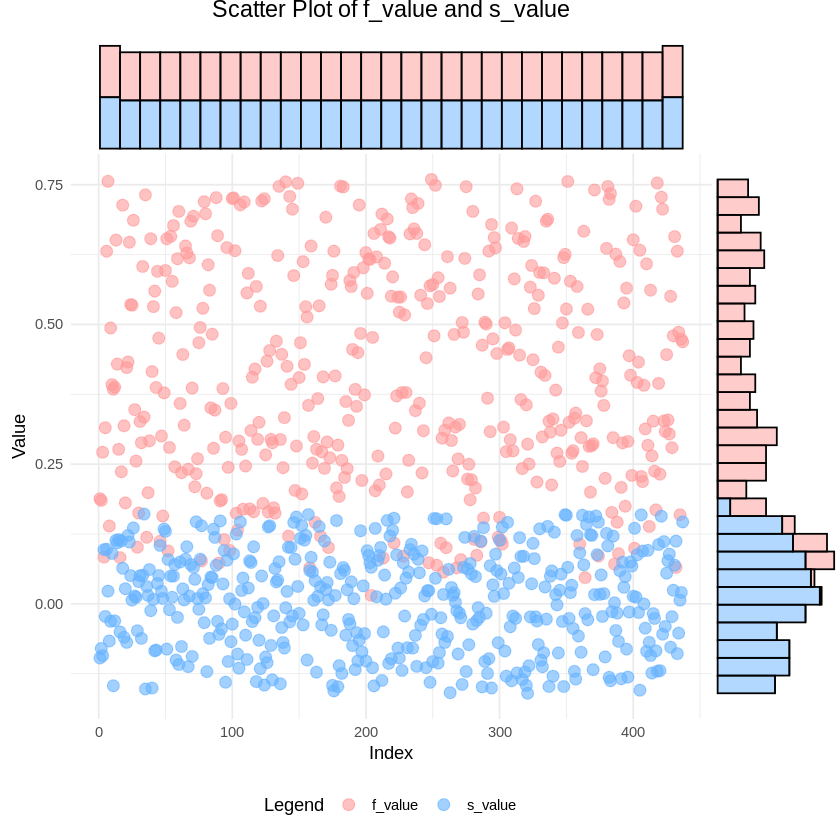

In [67]:

# Create a data frame with two series for clear plotting
plot_data <- data.frame(
    x = 1:length(f_value),  # Index for points
    f_value = f_value,
    s_value = s_value
)

# Reshape data for ggplot compatibility
plot_data_long <- reshape2::melt(plot_data, id.vars = "x", variable.name = "Type", value.name = "Value")

# Create the scatter plot with distinct colors
p <- ggplot(plot_data_long, aes(x = x, y = Value, color = Type)) +
    geom_point(alpha = 0.6, size = 3) +
    scale_color_manual(
        values = c("f_value" = "#FF9999", "s_value" = "#66B2FF"),
        labels = c("f_value", "s_value")
    ) +
    theme_minimal() +
    labs(
        title = "Scatter Plot of f_value and s_value",
        x = "Index",
        y = "Value",
        color = "Legend"
    ) +
    theme(
        plot.title = element_text(hjust = 0.5, size = 14),
        legend.position = "bottom"
    )

# Add marginal histograms for each variable
p_with_marginals <- ggMarginal(
    p,
    type = "histogram",
    margins = "both",
    groupFill = TRUE
)

# Display the plot
print(p_with_marginals)

# Save the plot
ggsave("scatter_plot_f_s_values_fixed.png", p_with_marginals, width = 10, height = 8, dpi = 300)


### Conclusion and opportunities for improvement
Based on our comprehensive analysis of fMRI signal modeling using Model 2 (y = θ₁x₄ + θ₂x₃² + θ₃x₅ + θbias), we can conclude that our objectives have been achieved to a satisfactory degree. The model demonstrated good performance in capturing the relationships between input and output signals, as evidenced by our AIC, BIC, and residual analysis. Despite this success, there are several opportunities for improvement:

1. Insufficient Parameter Exploration: Our ABC algorithm implementation showed limited acceptance of parameter combinations, with clustering of accepted values in specific regions. Having more iterations and better prior distribution ranges would allow for more thorough exploration of the parameter space and potentially better model fits.

2. Data Splitting Concerns: Following Xu and Goodacre (2018), our current 70/30% split for training and testing could be improved by implementing cross-validation. This would help reduce potential overfitting and provide more robust model evaluation by using multiple subsets of the data rather than a single fixed split.

3. Model Complexity: The relationship between fMRI signals is inherently complex and potentially non-linear. While our polynomial regression approach with Model 2 showed good results, more sophisticated modeling approaches might better capture the intricate relationships in fMRI data. This could include:
   - Higher-order polynomial terms
   - Non-linear basis functions
   - More advanced statistical learning methods
4. ABC Implementation: Our current ABC implementation shows limited acceptance rates and potential bias in parameter estimation. Improvements could include:
   - More sophisticated ABC algorithms
   - Better tuning of the epsilon threshold
   - More informative prior distributions
   - Increased number of iterations

By addressing these limitations, we could enhance the robustness and reliability of our fMRI signal modeling approach while maintaining the interpretability advantages of our current method.



###References
Reference list Allen, D.M. (1971). Mean Square Error of Prediction as a Criterion for Selecting Variables. Technometrics, 13(3), pp.469–475. doi:10.1080/00401706.1971.10488811.

Barone, A. (2022). How Residual Sum of Squares (RSS) Works. [online] Investopedia. Available at: https://www.investopedia.com/terms/r/residual-sum-of-squares.asp.

Bertini, E., Correll, M. and Franconeri, S. (2020). Why Shouldn’t All Charts Be Scatter Plots? Beyond Precision-Driven Visualizations. [online] IEEE Xplore. doi:10.1109/VIS47514.2020.00048.

Bevans, R. (2020). Akaike Information Criterion | When & How to Use It (Example). [online] Scribbr. Available at: https://www.scribbr.com/statistics/akaike-information-criterion/#:~:text=It%20penalizes%20models%20which%20use [Accessed 31 Jan. 2023].

Björck, Å. (1990). Least squares methods. [online] ScienceDirect. Available at: https://www.sciencedirect.com/science/article/abs/pii/S1570865905800365 [Accessed 4 Oct. 2022].

Bond, S. (2004). Essential Medical Statistics (2nd edn). Kirkwood BR, Sternc JAC. Malden, MA: Blackwell Publishing, 2003, pp. 288, $52.95 (PB). ISBN 0865428719. International Journal of Epidemiology, 33(6), pp.1418–1419. doi:10.1093/ije/dyh364.

Breiman, L. and Spector, P. (1992). Submodel Selection and Evaluation in Regression. The X-Random Case. International Statistical Review / Revue Internationale de Statistique, 60(3), p.291. doi:10.2307/1403680.

Brownlee, J. (2019). Probabilistic Model Selection with AIC, BIC, and MDL. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/probabilistic-model-selection-measures/.

Chen, J. (2019). Line Of Best Fit. [online] Investopedia. Available at: https://www.investopedia.com/terms/l/line-of-best-fit.asp.

Clay Ford (2015). Understanding Q-Q Plots | University of Virginia Library Research Data Services + Sciences. [online] Virginia.edu. Available at: https://data.library.virginia.edu/understanding-q-q-plots/.

Constantine, N.A. (2012). Regression Analysis and Causal Inference: Cause for Concern? Perspectives on Sexual and Reproductive Health, [online] 44(2), pp.134–137. Available at: https://www.jstor.org/stable/42004111 [Accessed 30 Jan. 2023].

Crompton, D. (2015). Histograms and Kernels Density Estimates - David Crompton - Medium. [online] Medium. Available at: https://medium.com/@dcomp/histograms-and-kernels-density-estimates-a2c41eb08de3.

Csilléry, K., Blum, M.G.B., Gaggiotti, O.E. and François, O. (2010). Approximate Bayesian Computation (ABC) in practice. Trends in Ecology & Evolution, 25(7), pp.410–418. doi:10.1016/j.tree.2010.04.001.

Datacadamia (2014). Statistics - Bayesian Information Criterion (BIC). [online] Datacadamia - Data and Co. Available at: https://datacadamia.com/data_mining/bic [Accessed 31 Jan. 2023].

De’ath, G. and Fabricius, K.E. (2000). CLASSIFICATION AND REGRESSION TREES: A POWERFUL YET SIMPLE TECHNIQUE FOR ECOLOGICAL DATA ANALYSIS. Ecology, 81(11), pp.3178–3192. doi:10.1890/0012-9658(2000)081[3178:cartap]2.0.co;2.

Di Leo, G. and Sardanelli, F. (2020). Statistical significance: p value, 0.05 threshold, and applications to radiomics—reasons for a conservative approach. European Radiology Experimental, 4(1). doi:10.1186/s41747-020-0145-y.

Doane, D.P. and Seward, L.E. (2011). Measuring Skewness: A Forgotten Statistic? Journal of Statistics Education, 19(2). doi:10.1080/10691898.2011.11889611.

Drechsler, J. and Reiter, J.P. (2011). An empirical evaluation of easily implemented, nonparametric methods for generating synthetic datasets. Computational Statistics & Data Analysis, 55(12), pp.3232–3243. doi:10.1016/j.csda.2011.06.006.

Duong, T. (2007). ks: Kernel Density Estimation and Kernel Discriminant Analysis for Multivariate Data inR. Journal of Statistical Software, 21(7). doi:10.18637/jss.v021.i07.

Eells, E. (2004). Review: Bayes’s Theorem. Mind, 113(451), pp.591–596. doi:10.1093/mind/113.451.591.

Evans, M., Hastings, N. and Peacock, B. (2000). Statistical Distributions, Third Edition. Measurement Science and Technology, 12(1), pp.117–117. doi:10.1088/0957-0233/12/1/702.

Frost, J. (2018). One-Tailed and Two-Tailed Hypothesis Tests Explained - Statistics By Jim. [online] Statistics By Jim. Available at: https://statisticsbyjim.com/hypothesis-testing/one-tailed-two-tailed-hypothesis-tests/.

Healthline (2012). EEG (Electroencephalogram): Purpose, Procedure, and Risks. [online] Healthline. Available at: https://www.healthline.com/health/eeg.

Laerd.com. (2018). Pearson Product-Moment Correlation - Guidelines to interpretation of the coefficient, detecting outliers and the type of variables needed. [online] Available at: https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide-2.php.

Manikantan, A. (2021). Akaike Information Criterion: Model Selection. [online] Geek Culture. Available at: https://medium.com/geekculture/akaike-information-criterion-model-selection-c47df96ee9a8.

Music, A. (2020). Gaussian Distribution and Maximum Likelihood Estimate Method (Step-by-Step). [online] The Startup. Available at: https://medium.com/swlh/gaussian-distribution-and-maximum-likelihood-estimate-method-step-by-step-e4f6014fa83e [Accessed 31 Jan. 2023].

Nguyen, Q.H., Ly, H.-B., Ho, L.S., Al-Ansari, N., Le, H.V., Tran, V.Q., Prakash, I. and Pham, B.T. (2021). Influence of Data Splitting on Performance of Machine Learning Models in Prediction of Shear Strength of Soil. Mathematical Problems in Engineering, [online] 2021, pp.1–15. doi:10.1155/2021/4832864.

Ogunbiyi, I.A. (2022). Top Evaluation Metrics for Regression Problems in Machine Learning. [online] freeCodeCamp.org. Available at: https://www.freecodecamp.org/news/evaluation-metrics-for-regression-problems-machine-learning/

Peterka, V. (1981). Chapter 8 - BAYESIAN APPROACH TO SYSTEM IDENTIFICATION. [online] ScienceDirect. Available at: https://www.sciencedirect.com/science/article/pii/B9780080256832500132 [Accessed 31 Jan. 2023].

Rahman, M. and Zhang, Q. (2015). COMPARISON AMONG PEARSON CORRELATION COEFFICIENT TESTS. Far East Journal of Mathematical Sciences (FJMS), 99(2), pp.237–255. doi:10.17654/ms099020237.

Schork, J. (n.d.). Solve System of Equations in R (3 Examples) | Using solve() Function. [online] Statistics Globe. Available at: https://statisticsglobe.com/solve-system-of-equations-in-r/.

Sedgwick, P. (2014). Understanding confidence intervals. BMJ, 349(oct06 12), pp.g6051–g6051. doi:10.1136/bmj.g6051.

Shalizi, C.R. (2016). Advanced Data Analysis from an Elementary Point of View. [online] Available at: https://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ADAfaEPoV.pdf [Accessed 31 Jan. 2023].

Smith, C.J. (2012). Interpreting confidence intervals. Phlebology: The Journal of Venous Disease, 27(3), pp.141–142. doi:10.1258/phleb.2012.012j02.

St, E.K., Frey, L.C., Britton, J.W., Frey, L.C., Hopp, J.L., Pearce Korb, Koubeissi, M.Z., Lievens, W.E., Pestana-Knight, E.M. and St, E.K. (2016). Introduction Electroencephalography (EEG): An Introductory Text and Atlas of Normal and Abnormal Findings in Adults, Children, and Infants [Internet]. [online] Nih.gov. Available at: https://www.ncbi.nlm.nih.gov/books/NBK390346/.

Stephanie (2021). Log Likelihood Function. [online] Statistics How To. Available at: https://www.statisticshowto.com/log-likelihood-function/ [Accessed 31 Jan. 2023].

Taylor, R. (1990). Interpretation of the Correlation Coefficient: A Basic Review. Journal of Diagnostic Medical Sonography, [online] 6(1), pp.35–39. doi:10.1177/875647939000600106.

Trevor Hastie, Tibshirani, R. and Friedman, J. (2009). The Elements of Statistical Learning. Editorial: New York, Ny Springer New York.

Upadhaya, M.D. (2020). Correlation & Causation. [online] Medium. Available at: https://medium.com/analytics-vidhya/correlation-causation-977f71bb1e36.

Valchanov, I. (2018). Sum of Squares: SST, SSR, SSE. [online] 365 Data Science. Available at: https://365datascience.com/tutorials/statistics-tutorials/sum-squares/.

von Hippel, P.T. (2005). Mean, Median, and Skew: Correcting a Textbook Rule. Journal of Statistics Education, 13(2). doi:10.1080/10691898.2005.11910556.

Wolfgang Karl Hrdle (2020). Applied Multivariate Statistical Analysis. S.L.: Springer.

Xu, Y. and Goodacre, R. (2018). On Splitting Training and Validation Set: A Comparative Study of Cross-Validation, Bootstrap and Systematic Sampling for Estimating the Generalization Performance of Supervised Learning. Journal of Analysis and Testing, 2(3), pp.249–262. doi:10.1007/s41664-018-0068-2.

Zach (2021a). How to Interpret Log-Likelihood Values (With Examples). [online] Statology. Available at: https://www.statology.org/interpret-log-likelihood/.

Zach (2021b). How to Interpret Negative AIC Values. [online] Statology. Available at: https://www.statology.org/negative-aic/.

In [69]:
# Assuming your notebook is in the current working directory
file_path <- "assim.ipynb"

# Convert the notebook to HTML
output_file <- "assim.html"
system(paste("jupyter nbconvert", file_path, "--to html", "--output", output_file))